# NLP_State Gov Complaint / Question Classification Project

### –ü—Ä–æ–µ–∫—Ç –≥—Ä—É–ø–ø—ã —Ä–∞–∑–≤–∏—Ç–∏—è –º–µ–¥–∏–∞–∞–Ω–∞–ª–∏—Ç–∏–∫–∏ –≤ –≥. –ú–æ—Å–∫–≤–∞

## –ó–∞–¥–∞—á–∞

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –ø—Ä–∏—Å–≤–∞–∏–≤–∞—Ç—å —Å–æ–æ–±—â–µ–Ω–∏—è–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∫–ª–∞—Å—Å - *–∂–∞–ª–æ–±–∞ / –≤–æ–ø—Ä–æ—Å.*

## –ú–µ—Ç–æ–¥–æ–ª–æ–≥–∏—è –ø—Ä–æ–µ–∫—Ç–∞

1. –°–¥–µ–ª–∞—Ç—å –ø–µ—Ä–≤–∏—á–Ω—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö.
2. –û–±—É—á–∏—Ç—å –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –Ω–∞—á–∏–Ω–∞—è —Å baselines.
3. –û—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º –∫–∞—á–µ—Å—Ç–≤–∞ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à—É—é.
4. –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã.

## –î–∞–Ω–Ω—ã–µ

–í –∫–∞—á–µ—Å—Ç–≤–µ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–µ–¥–ª–æ–∂–µ–Ω —Ñ–∞–π–ª, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –≤ —Å–µ–±–µ –≤–æ–ø—Ä–æ—Å—ã –≤ –∞–¥—Ä–µ—Å –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∏ –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω—ã—Ö –æ—Ä–≥–∞–Ω–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –æ—Å—Ç–∞–≤–∏–ª–∏ –≤ —Å–æ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–µ—Ç—è—Ö. –§–∞–π–ª —Å –¥–∞–Ω–Ω—ã–º–∏ –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è [–∑–¥–µ—Å—å](https://docs.google.com/spreadsheets/d/1VoONQ5Li6hYFv1SGmUKEWdnm7wYDmWYi/edit?usp=sharing&ouid=117398067332429699807&rtpof=true&sd=true).


In [274]:
import nltk
import pandas as pd

from functools import lru_cache

import fasttext.util
import lightgbm as lgb
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from gensim.models import word2vec
from pymorphy2 import MorphAnalyzer

# –∑–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ Word2Vec –¥–ª—è –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
nltk.download('stopwords')
import warnings

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer # TfidfVectorizer –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç —Ç–µ–∫—Å—Ç—ã –≤ —á–∏—Å–ª–æ–≤—ã–µ –≤–µ–∫—Ç–æ—Ä—ã, –æ—Ç—Ä–∞–∂–∞—é—â–∏–µ –≤–∞–∂–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –∏–∑ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–∞–±–æ—Ä–∞ —Å–ª–æ–≤ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –Ω–∞–±–æ—Ä–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤–µ–∫—Ç–æ—Ä–∞) –≤ –∫–∞–∂–¥–æ–º —Ç–µ–∫—Å—Ç–µ
from sklearn.model_selection import GridSearchCV # –º–æ–¥—É–ª—å –ø–æ–∏—Å–∫–∞ –ø–æ —Å–µ—Ç–∫–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

from sklearn.pipeline import Pipeline

warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None
tqdm.pandas()

from tqdm import tqdm
# pipeline –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–∏–Ω –±–ª–æ–∫ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –∏ –º–æ–¥–µ–ª—å, —á—Ç–æ —É–ø—Ä–æ—â–∞–µ—Ç –Ω–∞–ø–∏—Å–∞–Ω–∏–µ –∫–æ–¥–∞ –∏ —É–ª—É—á—à–∞–µ—Ç –µ–≥–æ —á–∏—Ç–∞–µ–º–æ—Å—Ç—å
# TfidfVectorizer –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç —Ç–µ–∫—Å—Ç—ã –≤ —á–∏—Å–ª–æ–≤—ã–µ –≤–µ–∫—Ç–æ—Ä–∞, –æ—Ç—Ä–∞–∂–∞—é—â–∏–µ –≤–∞–∂–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –∏–∑ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–∞–±–æ—Ä–∞ —Å–ª–æ–≤ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –Ω–∞–±–æ—Ä–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤–µ–∫—Ç–æ—Ä–∞) –≤ –∫–∞–∂–¥–æ–º —Ç–µ–∫—Å—Ç–µ

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import warnings

import matplotlib.pyplot as plt
import numpy as np
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from functools import lru_cache

from catboost import CatBoostClassifier
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from deeppavlov.core.common.file import read_json
from deeppavlov import build_model, configs
from pymystem3 import Mystem
from multiprocessing import Pool
from catboost import Pool
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer
from catboost import Pool, CatBoostClassifier, cv
from tqdm import tqdm
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('snowball_data')
nltk.download('perluniprops')
nltk.download('universal_tagset')
nltk.download('nonbreaking_prefixes')
nltk.download('wordnet')

warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading pa

In [2]:
# –≤ nltk –º–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–æ–≤
from nltk import tokenize
dir(tokenize)[:16]

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordDetokenizer']

In [3]:
from nltk.corpus import stopwords

# —Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ —è–∑—ã–∫–∏ –µ—Å—Ç—å
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [4]:
# –≤—ã–≤–µ–¥–µ–º –≤—Å–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
sw = stopwords.words('russian')
print(sw)

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ', '–∫–∞–∫', '–∞', '—Ç–æ', '–≤—Å–µ', '–æ–Ω–∞', '—Ç–∞–∫', '–µ–≥–æ', '–Ω–æ', '–¥–∞', '—Ç—ã', '–∫', '—É', '–∂–µ', '–≤—ã', '–∑–∞', '–±—ã', '–ø–æ', '—Ç–æ–ª—å–∫–æ', '–µ–µ', '–º–Ω–µ', '–±—ã–ª–æ', '–≤–æ—Ç', '–æ—Ç', '–º–µ–Ω—è', '–µ—â–µ', '–Ω–µ—Ç', '–æ', '–∏–∑', '–µ–º—É', '—Ç–µ–ø–µ—Ä—å', '–∫–æ–≥–¥–∞', '–¥–∞–∂–µ', '–Ω—É', '–≤–¥—Ä—É–≥', '–ª–∏', '–µ—Å–ª–∏', '—É–∂–µ', '–∏–ª–∏', '–Ω–∏', '–±—ã—Ç—å', '–±—ã–ª', '–Ω–µ–≥–æ', '–¥–æ', '–≤–∞—Å', '–Ω–∏–±—É–¥—å', '–æ–ø—è—Ç—å', '—É–∂', '–≤–∞–º', '–≤–µ–¥—å', '—Ç–∞–º', '–ø–æ—Ç–æ–º', '—Å–µ–±—è', '–Ω–∏—á–µ–≥–æ', '–µ–π', '–º–æ–∂–µ—Ç', '–æ–Ω–∏', '—Ç—É—Ç', '–≥–¥–µ', '–µ—Å—Ç—å', '–Ω–∞–¥–æ', '–Ω–µ–π', '–¥–ª—è', '–º—ã', '—Ç–µ–±—è', '–∏—Ö', '—á–µ–º', '–±—ã–ª–∞', '—Å–∞–º', '—á—Ç–æ–±', '–±–µ–∑', '–±—É–¥—Ç–æ', '—á–µ–≥–æ', '—Ä–∞–∑', '—Ç–æ–∂–µ', '—Å–µ–±–µ', '–ø–æ–¥', '–±—É–¥–µ—Ç', '–∂', '—Ç–æ–≥–¥–∞', '–∫—Ç–æ', '—ç—Ç–æ—Ç', '—Ç–æ–≥–æ', '–ø–æ—Ç–æ–º—É', '—ç—Ç–æ–≥–æ', '–∫–∞–∫–æ–π', '—Å–æ–≤—Å–µ–º', '–Ω–∏–º', '–∑

## –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –∏–∑—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [5]:
df = pd.read_excel("C:\\Users\\HOME\\PycharmProjects\\Data_scientist_NLP_–¥–∞–Ω–Ω—ã–µ.xlsx")
df.head(20)

–î–∞—Ç–∞ –ö–∞—Ç–µ–≥–æ—Ä–∏—è                              –¢–µ–º–∞  \
0  2022-04-02 15:43:24.726    –í–æ–ø—Ä–æ—Å                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
1  2022-05-06 14:46:31.109    –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
2  2022-01-14 07:20:51.308    –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
3  2022-05-18 03:54:37.952    –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
4  2022-05-20 07:33:30.558    –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
5  2022-07-19 05:28:42.565    –ñ–∞–ª–æ–±–∞                          –≠–∫–æ–ª–æ–≥–∏—è   
6  2022-05-17 06:14:50.682    –ñ–∞–ª–æ–±–∞                               –ñ–ö–•   
7  2022-03-09 11:12:59.799    –ñ–∞–ª–æ–±–∞                               –ñ–ö–•   
8  2022-03-06 14:06:36.410    –í–æ–ø—Ä–æ—Å                               –ñ–ö–•   
9  2022-01-06 20:53:11.803    –í–æ–ø—Ä–æ—Å          –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ/–ú–µ–¥–∏—Ü–∏–Ω–∞   
10 2022-04-15 11:53:52.238    –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
11 2022-03-14 07:38:10.457    –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
12 2022-05-19 10:32:25.991    –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
13 2022-04-05 06:25:26.322    –í–æ–ø—Ä–æ—Å                      –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å   
14 2022-05-17 06:22:02.628    –í–æ–ø—Ä–æ—Å                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
15 2022-01-06 09:46:03.890    –í–æ–ø—Ä–æ—Å          –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ/–ú–µ–¥–∏—Ü–∏–Ω–∞   
16 2022-03-28 04:21:01.856    –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
17 2022-01-12 19:28:32.257    –í–æ–ø—Ä–æ—Å                     –ì–∞–∑ –∏ —Ç–æ–ø–ª–∏–≤–æ   
18 2022-04-15 16:21:51.735    –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
19 2022-04-22 09:43:28.690    –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   

        –ú—É–Ω–∏—Ü–∏–ø–∞–ª–∏—Ç–µ—Ç                                              –¢–µ–∫—Å—Ç  
0   –•–∞–π–±—É–ª–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω  '–í–∏–¥ –∏–∑ –æ–∫–Ω–∞ –ø–æ—Ç—Ä—è—Å–∞—é—â–∏–π (–ø—Ä. –°. –Æ–ª–∞–µ–≤–∞ –Ω–∞–ø—Ä–æ—Ç...  
1            –ë—Ä—è–Ω—Å–∫ –≥  '[id294938415:bp-88767010_4|Œë–Ω–∞—Å—Ç–∞—Å–∏—è], –ó–¥—Ä–∞–≤—Å...  
2          –£–ª–∞–Ω-–£–¥—ç –≥  '[club53367440:bp-53367440_121743|–ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ...  
3          –£–ª–∞–Ω-–£–¥—ç –≥              '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –∫–æ–≥–¥–∞ –±—É–¥–µ—Ç –≤—ã–ø–ª–∞—Ç–∞ –î–í?  
4         –ß–µ–ª—è–±–∏–Ω—Å–∫ –≥  '–î–µ–≤–æ—á–∫–∏ –≤—Å–µ–º –ø—Ä–∏–≤–µ—Ç,—É –º–µ–Ω—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å –ø–æ–ª—É—á...  
5       –ò–≤–Ω—è–Ω—Å–∫–∏–π —Ä-–Ω  '–ö–æ–≥–¥–∞ –±—É–¥–µ—Ç –ø—Ä–∏–≤–µ–¥—ë–Ω –≤ –ø–æ—Ä—è–¥–æ–∫ –ø—Ä—É–¥ –≤ —Ü–µ–Ω—Ç—Ä–µ ...  
6              –ö–æ—Ç–ª–∞—Å  '–û–±—Ä–∞—â–∞—é—Å—å –æ—Ç –∏–º–µ–Ω–∏ –æ–¥–∏–Ω–æ–∫–∏—Ö –ø—Ä–µ—Å—Ç–∞—Ä–µ–ª—ã—Ö –ª—é–¥–µ–π...  
7    –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π —Ä-–Ω  '–î–æ–±—Ä—ã–π –¥–µ–Ω—å,–ò–≥–æ—Ä—å –Æ—Ä—å–µ–≤–∏—á!–° 4 –º–∞—Ä—Ç–∞ 2022 –≥–æ–¥–∞...  
8     –ö–∞–º—ã–∑—è–∫—Å–∫–∏–π —Ä-–Ω                   '–ê –ø—Ä–æ –ö–∞–º—ã–∑—è–∫—Å–∫–∏–π —Ä–∞–π–æ–Ω –∑–∞–±—ã–ª–∏?  
9       –ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫ –≥  '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!–°–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞,–ø—Ä–∞–≤–¥–∞ –ª–∏,—á—Ç–æ...  
10     –ë—É–∑–¥—è–∫—Å–∫–∏–π —Ä-–Ω  '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ú–æ–∂–µ—Ç –º–Ω–µ –∫—Ç–æ —Ç–æ –æ–±—ä—è—Å–Ω–∏—Ç –ø–æ—á–µ–º...  
11        –ß–µ–ª—è–±–∏–Ω—Å–∫ –≥  '–°–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ , –∫–∞–∫–∏–µ –ø–æ—Å–æ–±–∏—è –ø–æ–ª–æ–∂–µ–Ω–æ –Ω...  
12           –ë—Ä—è–Ω—Å–∫ –≥                    '–ê –∫–æ–≥–¥–∞ –í–æ–ª–æ–¥–∞—Ä–∫—É –≤–æ—Å—Å—Ç–∞–Ω–æ–≤—è—Ç.  
13         –£–ª–∞–Ω-–£–¥—ç –≥  '–í–æ–ø—Ä–æ—Å–æ–≤ –º–Ω–æ–≥–æ –∫ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏–∏ –≥–æ—Ä–æ–¥–∞. –ì–¥–µ –¥–µ...  
14     –ú–∞–≥–Ω–∏—Ç–æ–≥–æ—Ä—Å–∫ –≥  '–ê –∫–æ–º–∏—Å—Å–∏—è —Å —à—Ç—Ä–∞—Ñ–∞–º–∏ –∑–∞ –ø–∞—Ä–∫–æ–≤–∫—É –Ω–∞ –≥–∞–∑–æ–Ω–∞—Ö ...  
15   –ö–∞–ª—Ç–∞—Å–∏–Ω—Å–∫–∏–π —Ä-–Ω  '–ö–æ–≥–¥–∞ —Ä–µ—à–∏—Ç–µ –ø—Ä–æ–±–ª–µ–º—ã —Å –∂–∏–∑–Ω–µ–Ω–Ω–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–º–∏...  
16       

In [6]:
df.columns

Index(['–î–∞—Ç–∞', '–ö–∞—Ç–µ–≥–æ—Ä–∏—è', '–¢–µ–º–∞', '–ú—É–Ω–∏—Ü–∏–ø–∞–ª–∏—Ç–µ—Ç', '–¢–µ–∫—Å—Ç'], dtype='object')

In [7]:
# rename the columns
d = df.rename(columns={'–ö–∞—Ç–µ–≥–æ—Ä–∏—è': 'category',
                        '–¢–µ–º–∞': 'topic',
                        '–ú—É–Ω–∏—Ü–∏–ø–∞–ª–∏—Ç–µ—Ç': 'municipality',
                        '–¢–µ–∫—Å—Ç': 'text',
                       '–î–∞—Ç–∞': 'date'})

# print the DataFrame to verify the column names
print(d.columns)
d

Index(['date', 'category', 'topic', 'municipality', 'text'], dtype='object')


date category                             topic  \
0     2022-04-02 15:43:24.726   –í–æ–ø—Ä–æ—Å                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
1     2022-05-06 14:46:31.109   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
2     2022-01-14 07:20:51.308   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
3     2022-05-18 03:54:37.952   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
4     2022-05-20 07:33:30.558   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
...                       ...      ...                               ...   
29544 2022-04-11 08:42:35.514   –í–æ–ø—Ä–æ—Å            –û–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç   
29545 2022-05-04 07:38:28.007   –í–æ–ø—Ä–æ—Å               –ú–§–¶ "–ú–æ–∏ –¥–æ–∫—É–º–µ–Ω—Ç—ã"   
29546 2022-04-15 19:15:52.086   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
29547 2022-07-11 07:51:28.096   –í–æ–ø—Ä–æ—Å            –û–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç   
29548 2022-01-12 18:48:37.840   –ñ–∞–ª–æ–±–∞                            –î–æ—Ä–æ–≥–∏   

            municipality                                               text  
0      –•–∞–π–±—É–ª–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω  '–í–∏–¥ –∏–∑ –æ–∫–Ω–∞ –ø–æ—Ç—Ä—è—Å–∞—é—â–∏–π (–ø—Ä. –°. –Æ–ª–∞–µ–≤–∞ –Ω–∞–ø—Ä–æ—Ç...  
1               –ë—Ä—è–Ω—Å–∫ –≥  '[id294938415:bp-88767010_4|Œë–Ω–∞—Å—Ç–∞—Å–∏—è], –ó–¥—Ä–∞–≤—Å...  
2             –£–ª–∞–Ω-–£–¥—ç –≥  '[club53367440:bp-53367440_121743|–ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ...  
3             –£–ª–∞–Ω-–£–¥—ç –≥              '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –∫–æ–≥–¥–∞ –±—É–¥–µ—Ç –≤—ã–ø–ª–∞—Ç–∞ –î–í?  
4            –ß–µ–ª—è–±–∏–Ω—Å–∫ –≥  '–î–µ–≤–æ—á–∫–∏ –≤—Å–µ–º –ø—Ä–∏–≤–µ—Ç,—É –º–µ–Ω—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å –ø–æ–ª—É—á...  
...                  ...                                                ...  
29544      –û–∫—Ç—è–±—Ä—å—Å–∫–∏–π –≥  '–î–æ–±—Ä—ã–π –¥–µ–Ω—å.–ü–æ—á–µ–º—É –ø–æ–¥–æ—Ä–æ–∂–∞–ª–∞ –ø–ª–∞—Ç–∞ –∑–∞ –ø—Ä–æ–µ–∑–¥...  
29545            –ú–∏–∞—Å—Å –≥  '–ú–∏–∞—Å—Å. –î–µ–≤–æ—á–∫–∏ –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω–∞ –ø—Ñ –æ...  
29546              –£—Ñ–∞ –≥  '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–æ—á–µ–º—É –ø—Ä–∏—à–µ–ª –æ—Ç–∫–∞–∑?<br>db7ced5b...  
29547         –ë–µ–ª–≥–æ—Ä–æ–¥ –≥  '–ê –ù–ê–ó–ê–î –° –ö–ê–ö–ò–ú –ò–ù–¢–ï–†–í–û–õ–û–ú –ë–£–î–£–¢ –ï–ó–î–ò–¢–¨ –ê–í–¢–û–ë...  
29548    –ê—Ö—Ç—É–±–∏–Ω—Å–∫–∏–π —Ä-–Ω  '–ú—ã —Ö–æ–¥–∏–º –≤ —ç—Ç–æ—Ç —Å–∞–¥,—è –∫–æ–≥–¥–∞ —ç—Ç–æ —É–≤–∏–¥–µ–ª–∞ –ø–æ–¥—É–º...  

[29549 rows x 5 columns]

### –ò–∑—É—á–∏–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é label –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞

–° –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º —Ç–∞—Ä–≥–µ—Ç–∞ –º–æ–∂–Ω–æ –±–æ—Ä–æ—Ç—å—Å—è —Ä–∞–∑–Ω—ã–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏:
* –ø—Ä–æ–≤–µ—Å—Ç–∏ upsampling, downsampling;
* –¥–æ–±–∞–≤–∏—Ç—å –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –∞—Ä–≥—É–º–µ–Ω—Ç ```class_weight = 'balanced'```

–í –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤—Ç–æ—Ä–æ–π —Å–ø–æ—Å–æ–±; –≤ —Ü–µ–ª—è—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ —Å–¥–µ–ª–∞–µ–º downsampling.

In [8]:
d['category'].unique()

array(['–í–æ–ø—Ä–æ—Å', '–ñ–∞–ª–æ–±–∞'], dtype=object)

In [9]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ —Ç–∞—Ä–≥–µ—Ç–∞ –Ω–∞ –¥–∏—Å–±–∞–ª–∞–Ω—Å
d['category'].value_counts()

–í–æ–ø—Ä–æ—Å    24549
–ñ–∞–ª–æ–±–∞     5000
Name: category, dtype: int64

In [10]:
d['category'].value_counts() / (len(df))

–í–æ–ø—Ä–æ—Å    0.83079
–ñ–∞–ª–æ–±–∞    0.16921
Name: category, dtype: float64

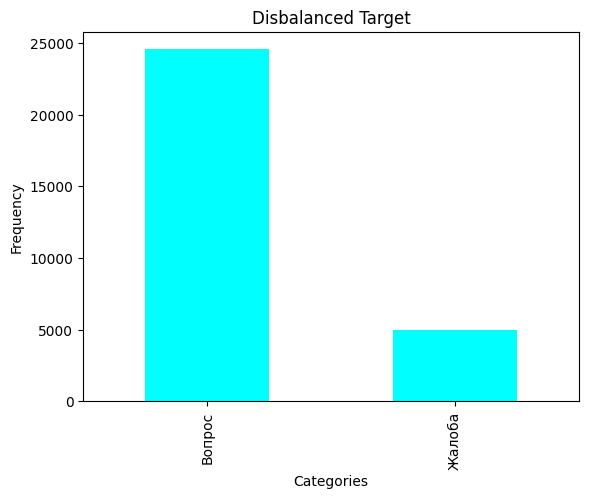

In [11]:
d['category'].value_counts().plot(kind='bar', color=['cyan'])

plt.title('Disbalanced Target')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show();

In [12]:
# –ø–µ—Ä–µ–∫–æ–¥–∏—Ä—É–µ–º —Ç–∞—Ä–≥–µ—Ç —Ü–∏—Ñ—Ä–∞–º–∏
d['label'] = d['category'].replace({'–í–æ–ø—Ä–æ—Å': 'question', '–ñ–∞–ª–æ–±–∞': 'complaint'})
d.head(30)

date category                             topic  \
0  2022-04-02 15:43:24.726   –í–æ–ø—Ä–æ—Å                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
1  2022-05-06 14:46:31.109   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
2  2022-01-14 07:20:51.308   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
3  2022-05-18 03:54:37.952   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
4  2022-05-20 07:33:30.558   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
5  2022-07-19 05:28:42.565   –ñ–∞–ª–æ–±–∞                          –≠–∫–æ–ª–æ–≥–∏—è   
6  2022-05-17 06:14:50.682   –ñ–∞–ª–æ–±–∞                               –ñ–ö–•   
7  2022-03-09 11:12:59.799   –ñ–∞–ª–æ–±–∞                               –ñ–ö–•   
8  2022-03-06 14:06:36.410   –í–æ–ø—Ä–æ—Å                               –ñ–ö–•   
9  2022-01-06 20:53:11.803   –í–æ–ø—Ä–æ—Å          –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ/–ú–µ–¥–∏—Ü–∏–Ω–∞   
10 2022-04-15 11:53:52.238   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
11 2022-03-14 07:38:10.457   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
12 2022-05-19 10:32:25.991   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
13 2022-04-05 06:25:26.322   –í–æ–ø—Ä–æ—Å                      –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å   
14 2022-05-17 06:22:02.628   –í–æ–ø—Ä–æ—Å                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
15 2022-01-06 09:46:03.890   –í–æ–ø—Ä–æ—Å          –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ/–ú–µ–¥–∏—Ü–∏–Ω–∞   
16 2022-03-28 04:21:01.856   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
17 2022-01-12 19:28:32.257   –í–æ–ø—Ä–æ—Å                     –ì–∞–∑ –∏ —Ç–æ–ø–ª–∏–≤–æ   
18 2022-04-15 16:21:51.735   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
19 2022-04-22 09:43:28.690   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
20 2022-07-02 12:28:40.114   –ñ–∞–ª–æ–±–∞                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
21 2022-01-23 23:32:12.669   –í–æ–ø—Ä–æ—Å                      –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å   
22 2022-05-16 06:26:25.303   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
23 2022-04-06 11:57:50.846   –ñ–∞–ª–æ–±–∞            –û–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç   
24 2022-04-12 17:53:30.747   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
25 2022-02-23 15:00:18.833   –í–æ–ø—Ä–æ—Å                       –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ   
26 2022-04-03 19:17:17.457   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
27 2022-06-22 06:02:33.266   –í–æ–ø—Ä–æ—Å               –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–≤–∏–¥–µ–Ω–∏–µ   
28 2022-07-08 19:39:31.390   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
29 2022-06-14 17:36:12.644   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   

           municipality                                               text  \
0     –•–∞–π–±—É–ª–ª–∏–Ω—Å–∫–∏–π —Ä-–Ω  '–í–∏–¥ –∏–∑ –æ–∫–Ω–∞ –ø–æ—Ç—Ä—è—Å–∞—é—â–∏–π (–ø—Ä. –°. –Æ–ª–∞–µ–≤–∞ –Ω–∞–ø—Ä–æ—Ç...   
1              –ë—Ä—è–Ω—Å–∫ –≥  '[id294938415:bp-88767010_4|Œë–Ω–∞—Å—Ç–∞—Å–∏—è], –ó–¥—Ä–∞–≤—Å...   
2            –£–ª–∞–Ω-–£–¥—ç –≥  '[club53367440:bp-53367440_121743|–ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ...   
3            –£–ª–∞–Ω-–£–¥—ç –≥              '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –∫–æ–≥–¥–∞ –±—É–¥–µ—Ç –≤—ã–ø–ª–∞—Ç–∞ –î–í?   
4           –ß–µ–ª—è–±–∏–Ω—Å–∫ –≥  '–î–µ–≤–æ—á–∫–∏ –≤—Å–µ–º –ø—Ä–∏–≤–µ—Ç,—É –º–µ–Ω—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å –ø–æ–ª—É—á...   
5         –ò–≤–Ω—è–Ω—Å–∫–∏–π —Ä-–Ω  '–ö–æ–≥–¥–∞ –±—É–¥–µ—Ç –ø—Ä–∏–≤–µ–¥—ë–Ω –≤ –ø–æ—Ä—è–¥–æ–∫ –ø—Ä—É–¥ –≤ —Ü–µ–Ω—Ç—Ä–µ ...   
6                –ö–æ—Ç–ª–∞—Å  '–û–±—Ä–∞—â–∞—é—Å—å –æ—Ç –∏–º–µ–Ω–∏ –æ–¥–∏–Ω–æ–∫–∏—Ö –ø—Ä–µ—Å—Ç–∞—Ä–µ–ª—ã—Ö –ª—é–¥–µ–π...   
7      –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π —Ä-–Ω  '–î–æ–±—Ä—ã–π –¥–µ–Ω—å,–ò–≥–æ—Ä—å –Æ—Ä—å–µ–≤–∏—á!–° 4 –º–∞—Ä—Ç–∞ 2022 –≥–æ–¥–∞...   
8       –ö–∞–º—ã–∑—è–∫—Å–∫–∏–π —Ä-–Ω         

In [78]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –ø—Ä–æ–ø—É—Å–∫–∏
d.isna().sum()

date             0
category         0
topic           11
municipality     0
text             0
label            0
dtype: int64

–í –¥–∞–Ω–Ω—ã—Ö –∏–º–µ–µ—Ç—Å—è –¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–æ–ª–æ–Ω–∫–µ topic. –¢–∞–∫ –∫–∞–∫ —á–∏—Å–ª–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ < 10% –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, —Ç–æ –ø—Ä–æ–ø—É—Å–∫–∏ –º–æ–∂–Ω–æ –±–µ–∑–æ–ø–∞—Å–Ω–æ —É–¥–∞–ª–∏—Ç—å.

In [279]:
d = d.dropna()

In [280]:
d.isna().sum()

date            0
category        0
topic           0
municipality    0
text            0
label           0
dtype: int64

In [148]:
d['label'].unique()

array(['question', 'complaint'], dtype=object)

In [219]:
d.head(30)

date category                             topic  \
0  2022-04-02 15:43:24.726   –í–æ–ø—Ä–æ—Å                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
1  2022-05-06 14:46:31.109   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
2  2022-01-14 07:20:51.308   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
3  2022-05-18 03:54:37.952   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
4  2022-05-20 07:33:30.558   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
5  2022-07-19 05:28:42.565   –ñ–∞–ª–æ–±–∞                          –≠–∫–æ–ª–æ–≥–∏—è   
6  2022-05-17 06:14:50.682   –ñ–∞–ª–æ–±–∞                               –ñ–ö–•   
7  2022-03-09 11:12:59.799   –ñ–∞–ª–æ–±–∞                               –ñ–ö–•   
8  2022-03-06 14:06:36.410   –í–æ–ø—Ä–æ—Å                               –ñ–ö–•   
9  2022-01-06 20:53:11.803   –í–æ–ø—Ä–æ—Å          –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ/–ú–µ–¥–∏—Ü–∏–Ω–∞   
10 2022-04-15 11:53:52.238   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
11 2022-03-14 07:38:10.457   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
12 2022-05-19 10:32:25.991   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
13 2022-04-05 06:25:26.322   –í–æ–ø—Ä–æ—Å                      –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å   
14 2022-05-17 06:22:02.628   –í–æ–ø—Ä–æ—Å                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
15 2022-01-06 09:46:03.890   –í–æ–ø—Ä–æ—Å          –ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ/–ú–µ–¥–∏—Ü–∏–Ω–∞   
16 2022-03-28 04:21:01.856   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
17 2022-01-12 19:28:32.257   –í–æ–ø—Ä–æ—Å                     –ì–∞–∑ –∏ —Ç–æ–ø–ª–∏–≤–æ   
18 2022-04-15 16:21:51.735   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
19 2022-04-22 09:43:28.690   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
20 2022-07-02 12:28:40.114   –ñ–∞–ª–æ–±–∞                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ   
21 2022-01-23 23:32:12.669   –í–æ–ø—Ä–æ—Å                      –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å   
22 2022-05-16 06:26:25.303   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
23 2022-04-06 11:57:50.846   –ñ–∞–ª–æ–±–∞            –û–±—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç   
24 2022-04-12 17:53:30.747   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
25 2022-02-23 15:00:18.833   –í–æ–ø—Ä–æ—Å                       –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ   
26 2022-04-03 19:17:17.457   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   
27 2022-06-22 06:02:33.266   –í–æ–ø—Ä–æ—Å               –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–≤–∏–¥–µ–Ω–∏–µ   
28 2022-07-08 19:39:31.390   –í–æ–ø—Ä–æ—Å                            –î–æ—Ä–æ–≥–∏   
29 2022-06-14 17:36:12.644   –í–æ–ø—Ä–æ—Å  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞   

    municipality                                               text      label  
0            245  '–í–∏–¥ –∏–∑ –æ–∫–Ω–∞ –ø–æ—Ç—Ä—è—Å–∞—é—â–∏–π (–ø—Ä. –°. –Æ–ª–∞–µ–≤–∞ –Ω–∞–ø—Ä–æ—Ç...   question  
1             41  '[id294938415:bp-88767010_4|Œë–Ω–∞—Å—Ç–∞—Å–∏—è], –ó–¥—Ä–∞–≤—Å...   question  
2            236  '[club53367440:bp-53367440_121743|–ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ...   question  
3            236              '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –∫–æ–≥–¥–∞ –±—É–¥–µ—Ç –≤—ã–ø–ª–∞—Ç–∞ –î–í?   question  
4            254  '–î–µ–≤–æ—á–∫–∏ –≤—Å–µ–º –ø—Ä–∏–≤–µ—Ç,—É –º–µ–Ω—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å –ø–æ–ª—É—á...   question  
5             90  '–ö–æ–≥–¥–∞ –±—É–¥–µ—Ç –ø—Ä–∏–≤–µ–¥—ë–Ω –≤ –ø–æ—Ä—è–¥–æ–∫ –ø—Ä—É–¥ –≤ —Ü–µ–Ω—Ç—Ä–µ ...  complaint  
6            122  '–û–±—Ä–∞—â–∞—é—Å—å –æ—Ç –∏–º–µ–Ω–∏ –æ–¥–∏–Ω–æ–∫–∏—Ö –ø—Ä–µ—Å—Ç–∞—Ä–µ–ª—ã—Ö –ª—é–¥–µ–π...  complaint  
7            130  '–î–æ–±—Ä—ã–π –¥–µ–Ω—å,–ò–≥–æ—Ä—å –Æ—Ä—å–µ–≤–∏—á!–° 4 –º–∞—Ä—Ç–∞ 2022 –≥–æ–¥–∞...  complaint  
8             99                   '–ê –ø—Ä–æ –ö–∞–º—ã–∑—è–∫—Å–∫–∏–π —Ä–∞–π–æ–Ω –∑–∞–±—ã–ª–∏?   q

### –ò–∑—É—á–∏–º —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ

In [220]:
corpus = list(d['text'])
corpus

["'–í–∏–¥ –∏–∑ –æ–∫–Ω–∞ –ø–æ—Ç—Ä—è—Å–∞—é—â–∏–π (–ø—Ä. –°. –Æ–ª–∞–µ–≤–∞ –Ω–∞–ø—Ä–æ—Ç–∏–≤ –Æ–±–∏–ª–µ–π–Ω–æ–π). –ö–æ–≥–¥–∞ –Ω–∞–∫–æ–Ω–µ—Ü —É–±–µ—Ä–µ—Ç–µ —ç—Ç—É –ø–æ–º–æ–π–∫—É(—Å–∞—Ä–∞–∏, –ø–æ—Å—Ç—Ä–æ–π–∫–∏)",
 "'[id294938415:bp-88767010_4|Œë–Ω–∞—Å—Ç–∞—Å–∏—è], –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ –∫–∞–∫ –æ—Å–ø–æ—Ä–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ –æ—Ç–∫–∞–∑—É –ø–æ—Å–æ–±–∏—è —Å 8 –¥–æ 17? –ù–∞—Å—á–∏—Ç–∞–ª–∏ –±–æ–ª—å—à—É—é —Å—É–º–º—É, –∞ –ø–æ —Ñ–∞–∫—Ç—É –º–µ–Ω—å—à–µ. –ö–∞–∫ –±—ã—Ç—å?—Å–ø–∞—Å–∏–±–æ",
 "'[club53367440:bp-53367440_121743|–ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ], –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –° 3 –¥–æ 7 —É–∂–µ –Ω–∞–ø—Ä–∞–≤–∏–ª–∏? –°–µ–≥–æ–¥–Ω—è –∂–µ —Ç–æ–ª—å–∫–æ 14",
 "'–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –∫–æ–≥–¥–∞ –±—É–¥–µ—Ç –≤—ã–ø–ª–∞—Ç–∞ –î–í?",
 "'–î–µ–≤–æ—á–∫–∏ –≤—Å–µ–º –ø—Ä–∏–≤–µ—Ç,—É –º–µ–Ω—è —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å –ø–æ–ª—É—á–∏–ª–∞ –ø–æ—Å–æ–±–∏–µ –≤–º–µ—Å—Ç–æ 12444,7 —Å –∫–æ–ø–µ–π–∫–∞–º–∏,–¥–µ—Ç—Å–∫–∏–µ –≤—á–µ—Ä–∞ –ø–µ—Ä–µ–æ—Ñ–æ—Ä–º–∏–ª–∞ –∫–æ—Ç–æ—Ä—ã–µ –¥–æ 1,5,–Ω–∞–º –≤—á–µ—Ä–∞ –∏—Å–ø–æ–

In [221]:
def lemmatize(text):
    m = Mystem()
    lemm_list = m.lemmatize(text)
    lemm_text = "".join(lemm_list)

    return lemm_text

def clear_text(text):
    clr = re.sub(r'[^–∞-—è–ê-–Ø—ë–Å ]', ' ', text)
    cleared_text = " ".join(clr.split())
    return cleared_text

In [222]:
# —Ç–µ—Å—Ç–∏—Ä—É–µ–º —Ñ—É–Ω–∫—Ü–∏–∏
print("–ò—Å—Ö–æ–¥–Ω—ã–π —Ç–µ–∫—Å—Ç:", corpus[153])
print()
print("–û—á–∏—â–µ–Ω–Ω—ã–π –∏ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç:", lemmatize(clear_text(corpus[153])))

–ò—Å—Ö–æ–¥–Ω—ã–π —Ç–µ–∫—Å—Ç: '–ê,–æ–Ω –±—É–¥–µ—Ç –µ–∑–¥–∏—Ç—å –ø–æ —Å—Ç–∞—Ä–æ–º—É –º–∞—Ä—à—Ä—É—Ç—É,—á–µ—Ä–µ–∑ –õ–ò–°–ö–ò,–Ω–µ –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ???

–û—á–∏—â–µ–Ω–Ω—ã–π –∏ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç: –∞ –æ–Ω –±—ã—Ç—å –µ–∑–¥–∏—Ç—å –ø–æ —Å—Ç–∞—Ä—ã–π –º–∞—Ä—à—Ä—É—Ç —á–µ—Ä–µ–∑ –ª–∏—Å–∫–∏ –Ω–µ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å



In [223]:
m = MorphAnalyzer()

# —É–±–∏—Ä–∞–µ–º –≤—Å–µ –Ω–µ–±—É–∫–≤–µ–Ω–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã
regex = re.compile("[–ê-–Ø–∞-—èA-z]+")


def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

In [224]:
print(d.text[0])

'–í–∏–¥ –∏–∑ –æ–∫–Ω–∞ –ø–æ—Ç—Ä—è—Å–∞—é—â–∏–π (–ø—Ä. –°. –Æ–ª–∞–µ–≤–∞ –Ω–∞–ø—Ä–æ—Ç–∏–≤ –Æ–±–∏–ª–µ–π–Ω–æ–π). –ö–æ–≥–¥–∞ –Ω–∞–∫–æ–Ω–µ—Ü —É–±–µ—Ä–µ—Ç–µ —ç—Ç—É –ø–æ–º–æ–π–∫—É(—Å–∞—Ä–∞–∏, –ø–æ—Å—Ç—Ä–æ–π–∫–∏)


In [225]:
# # —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ—á–∏—â–µ–Ω–Ω—ã—Ö –∏ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤
# processed_corpus = []
#
# # –ø—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞–∂–¥–æ–º—É —Ç–µ–∫—Å—Ç—É –≤ –∫–æ—Ä–ø—É—Å–µ, –ø—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –∏ –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞
# for text in corpus:
#     processed_text = lemmatize(clear_text(text))
#     processed_corpus.append(processed_text)

#### –ö–æ–¥ –≤—ã—à–µ - –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π, –Ω–æ –≤–≤–∏–¥—É –±–æ–ª—å—à–æ–≥–æ –æ–±—ä–µ–º–∞ –¥–∞–Ω–Ω—ã—Ö —Ü–∏–∫–ª–æ–º –æ–±—Ö–æ–¥–∏—Ç—å –≤–µ—Å—å –∫–æ—Ä–ø—É—Å –∑–∞–Ω–∏–º–∞–µ—Ç –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏. –°–∞–º –ø–æ —Å–µ–±–µ Mystem() –æ—á–µ–Ω—å –¥–æ–ª–≥–∏–π. –ù—É–∂–Ω–æ –∫–∞–∫–æ–µ-—Ç–æ –±–æ–ª–µ–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ.

#### –ú–µ—Ç–æ–¥ ```@lru_cashe``` —Å–æ–∑–¥–∞–µ—Ç –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ lemmatize –∫—ç—à —É–∫–∞–∑–∞–Ω–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤ —Ü–µ–ª–æ–º —É—Å–∫–æ—Ä–∏—Ç—å –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–∞ (—á—Ç–æ –æ—á–µ–Ω—å –ø–æ–ª–µ–∑–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è - —Ä–µ—Å—É—Ä—Å–æ–µ–º–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å).

In [226]:
# create a MorphAnalyzer instance
m = MorphAnalyzer()

# set up regex to extract words from text
regex = re.compile("[–ê-–Ø–∞-—èA-z]+")

# set up stopwords
mystopwords = stopwords.words('russian')

# set up lemmatization cache
@lru_cache(maxsize=100000)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

# define text preprocessing function
def clean_text(text):
    # extract words from text
    tokens = regex.findall(text.lower())

    # lemmatize the words
    lemmas = [lemmatize_word(token) for token in tokens]

    # remove stopwords and short words
    words = [word for word in lemmas if word not in mystopwords and len(word) > 3]

    return words

In [227]:
print(*clean_text(d.text[3]))

–∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –≤—ã–ø–ª–∞—Ç–∞


In [228]:
text = d.text[13]
cleaned_text = clean_text(text)
print(cleaned_text)

['–≤–æ–ø—Ä–æ—Å', '–∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è', '–≥–æ—Ä–æ–¥', '–¥–µ–Ω—å–≥–∞', '–ø–æ—á–µ–º—É', '—Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ', '–∂–∏–≤–æ—Ç–Ω–æ–µ']


#### –ù–∞–º –Ω—É–∂–Ω–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –±–æ–ª—å—à–æ–π –æ–±—ä–µ–º —Ç–µ–∫—Å—Ç–∞, –ø–æ–º–∏–º–æ –∫—ç—à–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å —Ä–∞—Å–ø–∞—Ä–∞–ª–ª–µ–ª–∏–≤–∞–Ω–∏–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –º–µ—Ç–æ–¥–æ–º Pool –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ multiprocessing:

In [229]:
# %%time
# # N = 200
# # with Pool(4) as p:
# #     lemmas = list(tqdm(p.imap(clean_text, data['text']), total=N))
#
# with Pool(4) as p:
#     lemmas = list(tqdm(p.imap(clean_text, d['text']), total=len(d)))
#
# d['lemmas'] = lemmas
# d.sample(5)

–ö–æ–¥ –≤—ã—à–µ - –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π, –æ–¥–Ω–∞–∫–æ –≤–≤–∏–¥—É –±–æ–ª—å—à–æ–≥–æ –æ–±—ä–µ–º–∞ –¥–∞–Ω–Ω—ã—Ö –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–æ—Ö–æ–¥–∏—Ç –æ—á–µ–Ω—å –¥–æ–ª–≥–æ. –ü–æ–ø—Ä–æ–±—É–µ–º –Ω–∞–π—Ç–∏ –¥—Ä—É–≥–æ–µ —Ä–µ—à–µ–Ω–∏–µ.

## –ù–∞—á–∏–Ω–∞–µ–º —Å –ø—Ä–æ—Å—Ç—ã—Ö baselines

–≠—Ç–æ –≤—Å–µ–≥–¥–∞ —Ö–æ—Ä–æ—à–∞—è –ø—Ä–∞–∫—Ç–∏–∫–∞ - —Å–Ω–∞—á–∞–ª–∞ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —á—Ç–æ-—Ç–æ –ø—Ä–µ–¥–µ–ª—å–Ω–æ –ø—Ä–æ—Å—Ç–æ–µ. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —ç—Ç–æ –±—É–¥–µ—Ç –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è + –º–µ—à–æ–∫ —Å–ª–æ–≤ (Bag of Words, BoW).

In [230]:
d.columns

Index(['date', 'category', 'topic', 'municipality', 'text', 'label'], dtype='object')

In [231]:
data = d[['text', 'label', 'topic', 'municipality']]

In [232]:
train, test = train_test_split(data, test_size=0.2)

In [233]:
X_train = train.drop(columns=['label'])
y_train = train[['label']]

X_test = test.drop(columns=['label'])
y_test = test[['label']]

In [234]:
train.sample()

text     label  \
1772  '–ê–Ω–æ–Ω. –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –Ω–∞ –º–æ–ª–æ—á–Ω–æ–π –∫—É—Ö–Ω–µ –∫–æ–Ω—á–∏–ª–∞—Å—å ...  question   

                                 topic  municipality  
1772  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           125

In [235]:
test.sample()

text     label  \
12920  '–í–æ–ø—Ä–æ—Å,–∑–∞ –∫–∞–∫–æ–π –æ–±—ä–µ–º –º—É—Å–æ—Ä–∞ —è –ø–ª–∞—á—É –¥–µ–Ω—å–≥–∏  question   

                  topic  municipality  
12920  –ú—É—Å–æ—Ä/–°–≤–∞–ª–∫–∏/–¢–ö–û           153

In [236]:
y_train.sample()

label
12115  complaint

In [237]:
y_test.sample()

label
8509  question

In [238]:
y_test = y_test['label'].values
y_test

array(['question', 'question', 'complaint', ..., 'question', 'question',
       'question'], dtype=object)

In [239]:
# —Å—Ç—Ä–æ–∏–º BoW –¥–ª—è —Å–ª–æ–≤
vec = CountVectorizer(ngram_range=(1, 1), token_pattern='\w{3,}')

In [240]:
bow = vec.fit_transform(train['text'])
bow

<23630x53162 sparse matrix of type '<class 'numpy.int64'>'
	with 463931 stored elements in Compressed Sparse Row format>

In [241]:
print(train.text[111])

'–°–∫–∞–∂–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, —Ä–æ–¥–∏—Ç–µ–ª—è–º —Å–æ–æ–±—â–∞–µ—Ç—Å—è, —á—Ç–æ –ø—Ä–µ–ø–∞—Ä–∞—Ç —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω—ã–π –¥–æ –¥–µ–∫–∞–±—Ä—è 2023 –≥–æ–¥–∞ —Å–æ–≥–ª–∞—Å–Ω–æ –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ–º—É —Ä–µ–µ—Å—Ç—Ä—É –∫–ª–∏–Ω–∏—á–µ—Å–∫–∏—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–π?


In [242]:
list(vec.vocabulary_.items())[:10]

[('–¥–µ–≤–æ—á–∫–∏', 12016),
 ('–ø—Ä–∏–≤–µ—Ç', 36561),
 ('–ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ', 33566),
 ('–ø–æ–∂–∞–ª—É–π—Å—Ç–∞', 33825),
 ('–æ—Ñ–æ—Ä–º–ª–µ–Ω–∞', 30574),
 ('–∫–∞–∫', 18228),
 ('—Å–∞–º–æ–∑–∞–Ω—è—Ç–∞—è', 41932),
 ('—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ', 44429),
 ('–≤—Å–µ', 8866),
 ('–¥–æ—Ö–æ–¥—ã', 13573)]

In [192]:
sorted(list(vec.vocabulary_.items()), key=lambda x: x[0])[:10]

[('000', 0),
 ('000—Ä', 1),
 ('000—Ç—Ä', 2),
 ('001', 3),
 ('002', 4),
 ('004463', 5),
 ('008', 6),
 ('00—á', 7),
 ('010', 8),
 ('014', 9)]

In [193]:
list(vec.vocabulary_.keys())[:10]

['club53367440',
 '53367440_123610',
 '–º–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ',
 '—Å–æ—Ü–∏–∞–ª—å–Ω–æ–π',
 '–∑–∞—â–∏—Ç—ã',
 '–Ω–∞—Å–µ–ª–µ–Ω–∏—è',
 '–±—É—Ä—è—Ç–∏–∏',
 '–∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ',
 '–µ—Å–ª–∏',
 '–º–∞—Ä—Ç–µ']

In [194]:
len(vec.vocabulary_.items())

53380

### –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [195]:
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(bow, y_train)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500, random_state=42)

In [196]:
# len(clf.coef_[0]) returns the length of the clf.coef_[0] array, which is equal to the number of features used in the model.
len(clf.coef_[0])

53380

In [197]:
bow_test = vec.transform(test['text'])
bow_test

<5908x53380 sparse matrix of type '<class 'numpy.int64'>'
	with 108598 stored elements in Compressed Sparse Row format>

In [198]:
pred = clf.predict(bow_test)
pred[:10]

array(['question', 'question', 'question', 'question', 'question',
       'question', 'question', 'question', 'question', 'question'],
      dtype=object)

In [199]:
accuracy_score(pred, y_test)

0.8706838185511171

In [200]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

   complaint       0.45      0.64      0.53       672
    question       0.95      0.90      0.93      5236

    accuracy                           0.87      5908
   macro avg       0.70      0.77      0.73      5908
weighted avg       0.89      0.87      0.88      5908



### *–í—ã–≤–æ–¥:*

**–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ, –±–µ–∑–æ –≤—Å—è–∫–æ–π –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –¥–µ–ª–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å—é 86.5% (0.865).** –ü–æ—Å–º–æ—Ç—Ä–∏–º –ø–æ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–µ–µ –Ω–∞ classification report.

* –ú–æ–¥–µ–ª—å –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –æ–±—â–µ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤ 0,86, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –æ–Ω–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –¥–ª—è 86% —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ.

* –ö–ª–∞—Å—Å question –∏–º–µ–µ—Ç –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ support (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ), —á–µ–º –∫–ª–∞—Å—Å complaint, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –µ–≥–æ –±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –ø–æ—è–≤–ª–µ–Ω–∏–µ –≤ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ. –ú–æ–¥–µ–ª—å –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ (0,95) –∏ –ø–æ–ª–Ω–æ—Ç—ã (0,89) –¥–ª—è –∫–ª–∞—Å—Å–∞ question, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –æ–Ω–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏ –Ω–µ –æ—à–∏–±–∞–µ—Ç—Å—è –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–Ω–æ–≥–∏—Ö —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–≤ –∫–∞–∫ question.

* –ö–ª–∞—Å—Å complaint –∏–º–µ–µ—Ç –±–æ–ª–µ–µ –Ω–∏–∑–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å (0,45) –∏ –ø–æ–ª–Ω–æ—Ç—É (0,65) –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –∫–ª–∞—Å—Å–æ–º question, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –º–µ–Ω–µ–µ —Ç–æ—á–Ω–æ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç —ç–∫–∑–µ–º–ø–ª—è—Ä—ã —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã–∑–≤–∞–Ω–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –ø—Ä–∏—á–∏–Ω–∞–º–∏, —Ç–∞–∫–∏–º–∏ –∫–∞–∫ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–æ–≤, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –Ω–µ —Ç–∞–∫ —Ö–æ—Ä–æ—à–æ –≤—ã–¥–µ–ª—è–µ—Ç —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –∫–ª–∞—Å—Å–∞ complaint, –∫–∞–∫ —ç—Ç–æ –¥–µ–ª–∞–µ—Ç –¥–ª—è –∫–ª–∞—Å—Å–∞ question.

* –ú–∞–∫—Ä–æ-—É—Å—Ä–µ–¥–Ω–µ–Ω–Ω–∞—è F1-–º–µ—Ä–∞ (0,73) –Ω–∏–∂–µ, —á–µ–º –≤–∑–≤–µ—à–µ–Ω–Ω–∞—è —Å—Ä–µ–¥–Ω—è—è F1-–º–µ—Ä–∞ (0,88), —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ question. –≠—Ç–æ —Ç–∞–∫–∂–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–º –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ –∏–ª–∏ —Å–º–µ—â–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –≤ —Å—Ç–æ—Ä–æ–Ω—É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–æ–≤.

**–í —Ü–µ–ª–æ–º, –æ—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∫–ª–∞—Å—Å–æ–º ```question```, –Ω–æ –º–æ–≥–ª–∞ –±—ã –ø–æ–ª—É—á–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —É–ª—É—á—à–µ–Ω–∏—è –≤ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∫–ª–∞—Å—Å–∞ ```complaint```.**


#### –ü–æ–ø—Ä–æ–±—É–µ–º –¥–æ–±–∞–≤–∏—Ç—å –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥ —Ç–µ–∫—Å—Ç–∞ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —É–ª—É—á—à–∏—Ç—Å—è –ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏.

–ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –≤–∫–ª—é—á–∞–µ—Ç —É–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–±—É–∫–≤–µ–Ω–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤, —Ç–æ–ø-—Å–ª–æ–≤ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é (—Å—Ç–µ–º–º–∏–Ω–≥ - –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –æ—Å–Ω–æ–≤–µ —Å–ª–æ–≤–∞ - –∏–ª–∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é - –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Å–ª–æ–≤ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ).

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –∑–∞–º–µ–Ω–∏–º –º–µ—à–æ–∫ —Å–ª–æ–≤ –Ω–∞ TF-IDF –º–∞—Ç—Ä–∏—Ü—É. –í –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏ –æ—Å—Ç–∞–≤–∏–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é.

### –ù–∞–ø–∏—à–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞.

1. (f1) –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –Ω–µ–±—É–∫–≤–µ–Ω–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤ –∏–∑ —Ç–µ–∫—Å—Ç–∞.
2. (f2) –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –Ω–µ–±—É–∫–≤–µ–Ω–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤
2. (f3) –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏–∏.
3. (f4) –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –∫–æ—Ä–æ—Ç–∫–∏—Ö (–º–µ–Ω–µ–µ 3 —Å–∏–º–≤–æ–ª–æ–≤) –∏ —Å—Ç–æ–ø-—Å–ª–æ–≤.

In [243]:
# f1
# –°–æ–∑–¥–∞–Ω–∏–µ —Ä–µ–≥—É–ª—è—Ä–Ω–æ–≥–æ –≤—ã—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞
m = MorphAnalyzer()
# set up regex to extract words from text
regex = re.compile("[–ê-–Ø–∞-—èA-z]+")

# set up stopwords
mystopwords = stopwords.words('russian')

def words_only(text, regex=regex):
    try:
        # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É –∏ –ø–æ–∏—Å–∫ –≤—Å–µ—Ö —Å–ª–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Ä–µ–≥—É–ª—è—Ä–Ω–æ–º—É –≤—ã—Ä–∞–∂–µ–Ω–∏—é
        return regex.findall(text.lower())
    except:
        # –ï—Å–ª–∏ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ—à–∏–±–∫–∞, –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫
        return []

# f2
@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form


# f3
def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

# f4
def remove_stopwords(lemmas, stopwords=mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]


# applying all
def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)

    return ' '.join(remove_stopwords(lemmas))

In [244]:
# —Ç–µ—Å—Ç–∏—Ä—É–µ–º –æ–±—Ä–∞–±–æ—Ç–∫—É
%time clean_text(data.text[13])

CPU times: total: 0 ns
Wall time: 2 ms


'–≤–æ–ø—Ä–æ—Å –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è –≥–æ—Ä–æ–¥ –¥–µ–Ω—å–≥–∞ –ø–æ—á–µ–º—É —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∂–∏–≤–æ—Ç–Ω–æ–µ'

##### –§—É–Ω–∫—Ü–∏–∏ —Ä–∞–±–æ—Ç–∞—é—Ç, –ø—Ä–æ–≤–æ–¥–∏–º –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥ –¥–ª—è train –∏ test –≤—ã–±–æ—Ä–æ–∫.

In [245]:
%%time
lemmas = list(tqdm(map(clean_text, train['text']), total=len(train)))

train['lemmas'] = lemmas
train.sample(5)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23630/23630 [00:54<00:00, 431.92it/s]

CPU times: total: 24.5 s
Wall time: 54.7 s


text     label  \
23823  '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, —Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞,—Å–∞–ª—é—Ç –±—É–¥–µ—Ç?...  question   
981    '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ. –ü–æ—á–µ–º—É –≤–µ—á–Ω–æ –¥–æ–ª–≥–∏–µ —Å—Ä–æ–∫–∏ —Ä–∞—Å—Å–º...  question   
3287   '–î–æ–±—Ä–æ–µ —É—Ç—Ä–æ! –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞,–ø–æ–¥–∞–ª–∞ –Ω–∞ ...  question   
3300   '–≠—Ç–æ –Ω—É–∂–Ω–æ –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ? –ò–ª–∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏?  question   
18881  '–ê –∫–æ–≥–¥–∞ –±—É–¥—É—Ç –¥–µ–ª–∞—Ç—å –¥–æ—Ä–æ–≥—É –≤ —Å–æ—Ç—ã—Ö –∏ –ø—É—Å—Ç—è—Ç ...  question   

                                  topic  municipality  \
23823                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ            23   
981    –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞            96   
3287   –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           254   
3300   –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           214   
18881                            –î–æ—Ä–æ–≥–∏           236   

                                                  lemmas  
23823  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ —Å–∫–∞–∑–∞—Ç—å –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ —Å–∞–ª—é—Ç –º–∞—Ä—à—Ä—É—Ç ...  
981    –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–æ—á–µ–º—É –≤–µ—á–Ω–æ –¥–æ–ª–≥–∏–π —Å—Ä–æ–∫ —Ä–∞—Å—Å–º–æ—Ç—Ä...  
3287   –¥–æ–±—Ä—ã–π —É—Ç—Ä–æ –ø–æ–¥—Å–∫–∞–∑–∞—Ç—å –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –ø–æ–¥–∞—Ç—å –ø–æ—Å–æ–±...  
3300              –Ω—É–∂–Ω–æ –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏  
18881  –¥–µ–ª–∞—Ç—å –¥–æ—Ä–æ–≥–∞ —Å–æ—Ç—ã–π –ø—É—Å—Ç–∏—Ç—å –º–∞—Ä—à—Ä—É—Ç –¥–æ—Ä–æ–≥–∞ –¥–∞—Ä...

In [246]:
%%time
lemmas_test = list(tqdm(map(clean_text, test['text']), total=len(test)))

test['lemmas'] = lemmas_test
test.sample(5)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5908/5908 [00:14<00:00, 417.74it/s]

CPU times: total: 6.88 s
Wall time: 14.1 s


text      label  \
9361   '–ê —Å 0 –¥–æ 3 –ª–µ—Ç –Ω–∞–¥–æ –ø–µ—Ä–µ–æ—Ñ–æ—Ä–º–ª—è—Ç—å? –ò–ª–∏ –∞–≤—Ç–æ–º–∞...   question   
15782  '–£–≤–∞–∂–∞–µ–º—ã–π –†–∞–¥–∏–π –§–∞—Ä–∏—Ç–æ–≤–∏—á!<br>–û–±—Ä–∞—â–∞—é—Ç—Å—è –∫ –í–∞...  complaint   
16015  '–ê –∫–∞–∫–æ–π –≥—Ä–∞–Ω—Ç –æ–Ω–µ–≥–∞ –ø–æ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤—É –Ω–µ –≤—ã–∏...   question   
18393  '–î–µ–≤–æ—á–∫–∏, 3-7 –ø–æ–¥–∞–≤–∞–ª–∞ 1. 06, –≤—á–µ—Ä–∞ –æ–¥–æ–±—Ä–µ–Ω–æ 1...   question   
11071  '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ —Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –∫–∞–∫–æ–π –ø—Ä–æ–∂–∏—Ç–æ...   question   

                                  topic  municipality  \
9361   –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           254   
15782                               –ñ–ö–•            33   
16015                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ           176   
18393  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           254   
11071  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞            23   

                                                  lemmas  
9361                               –ø–µ—Ä–µ–æ—Ñ–æ—Ä–º–ª—è—Ç—å –∞–≤—Ç–æ–º–∞—Ç  
15782  —É–≤–∞–∂–∞–µ–º—ã–π —Ä–∞–¥–∏–π —Ñ–∞—Ä–∏—Ç–æ–≤–∏—á –æ–±—Ä–∞—â–∞—Ç—å—Å—è –∂–∏—Ç–µ–ª—å –≥–æ...  
16015  –≥—Ä–∞–Ω—Ç –æ–Ω–µ–≥–∞ –±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –≤—ã–∏–≥—Ä–∞—Ç—å –ø–µ—Ä–µ–¥–∞–≤–∞—Ç...  
18393  –¥–µ–≤–æ—á–∫–∞ –ø–æ–¥–∞–≤–∞—Ç—å –≤—á–µ—Ä–∞ –æ–¥–æ–±—Ä–∏—Ç—å –ø–æ–¥–∞–≤–∞—Ç—å –ø–æ–¥—Å–∫...  
11071  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ —Å–∫–∞–∑–∞—Ç—å –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –ø—Ä–æ–∂–∏—Ç–æ—á–Ω—ã–π –º–∏...

#### –°—á–∏—Ç–∞–µ–º TF-IDF –º–∞—Ç—Ä–∏—Ü—É –∏ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å:

In [247]:
vec = TfidfVectorizer(ngram_range=(1, 2)) # —Å—Ç—Ä–æ–∏–º BoW –¥–ª—è —Å–ª–æ–≤
tfidf = vec.fit_transform(train['lemmas'])

clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(tfidf, y_train)

pred = clf.predict(vec.transform(test['lemmas']))
accuracy_score(pred, y_test)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8632362897765742

In [248]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

   complaint       0.33      0.68      0.44       475
    question       0.97      0.88      0.92      5433

    accuracy                           0.86      5908
   macro avg       0.65      0.78      0.68      5908
weighted avg       0.92      0.86      0.88      5908



In [249]:
vec = TfidfVectorizer(ngram_range=(1, 4))  # —Å—Ç—Ä–æ–∏–º BoW –¥–ª—è —Å–ª–æ–≤
tfidf = vec.fit_transform(train['lemmas'])

clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(tfidf, y_train)

pred = clf.predict(vec.transform(test['lemmas']))
accuracy_score(pred, y_test)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8612051455653351

In [250]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

   complaint       0.35      0.65      0.45       523
    question       0.96      0.88      0.92      5385

    accuracy                           0.86      5908
   macro avg       0.66      0.77      0.69      5908
weighted avg       0.91      0.86      0.88      5908



### *–í—ã–≤–æ–¥:* –ü–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ accuracy –Ω–µ —Å–∏–ª—å–Ω–æ –≤–æ–∑—Ä–æ—Å–ª–∞, –æ–¥–Ω–∞–∫–æ –ø–æ –º–∞—Ç—Ä–∏—Ü–µ –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:

* –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ "complaint" —Ç–æ—á–Ω–æ—Å—Ç—å (precision) –Ω–µ–≤—ã—Å–æ–∫–∞ (0.34), —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Å–æ–æ–±—â–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª—å –æ—Ç–Ω–æ—Å–∏—Ç –∫ –¥–∞–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –∂–∞–ª–æ–±–∞–º–∏. –û–¥–Ω–∞–∫–æ –ø–æ–ª–Ω–æ—Ç–∞ (recall) –≤—ã—Å–æ–∫–∞ (0.70), —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–∞—Ö–æ–¥–∏—Ç –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å –Ω–∞—Å—Ç–æ—è—â–∏—Ö –∂–∞–ª–æ–±.
* –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ "question" —Ç–æ—á–Ω–æ—Å—Ç—å –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∞ (0.97), —Ç–æ –µ—Å—Ç—å –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Å–æ–æ–±—â–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª—å –æ—Ç–Ω–æ—Å–∏—Ç –∫ –¥–∞–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —è–≤–ª—è—é—Ç—Å—è –≤–æ–ø—Ä–æ—Å–∞–º–∏. –ü–æ–ª–Ω–æ—Ç–∞ —Ç–∞–∫–∂–µ –≤—ã—Å–æ–∫–∞ (0.88).
* –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ (macro avg) –≥–æ–≤–æ—Ä—è—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –≤ —Ü–µ–ª–æ–º –¥–ª—è –æ–±–µ–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π.
* –í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ (weighted avg) –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –æ–±—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤—ã—Å–æ–∫–∞ (0.92), –æ–¥–Ω–∞–∫–æ —Ç–∞–∫–∂–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –ª—É—á—à–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π "question", —á–µ–º —Å "complaint".

**–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è –Ω–µ–ø–ª–æ—Ö–æ —Å –∑–∞–¥–∞—á–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –ü–æ–ø—Ä–æ–±—É–µ–º —É–ª—É—á—à–∏—Ç—å –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫—É –∏ –ø—Ä–∏–º–µ–Ω–∏—Ç—å —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.**

### Word2Vec

*–ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Å–ª–æ–≤ - –¥–ª—è —ç—Ç–æ–≥–æ —Å–ø–µ—Ä–≤–∞ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å Word2Vec c –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ gensim.*

–í—ã–ø–æ–ª–Ω–∏–º –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ ```Word2Vec``` –Ω–∞ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö, —Ö—Ä–∞–Ω—è—â–∏—Ö—Å—è –≤ —Å—Ç–æ–ª–±—Ü–µ ```'lemmas'``` –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ train. –ö–∞–∂–¥—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–∞–∑–±–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞ (—Ç–æ–∫–µ–Ω—ã), –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.

#### –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ—É–Ω–∫—Ü–∏–∏ Word2Vec:

* ```workers=4``` - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Ç–æ–∫–æ–≤, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏;
* ```vector_size=200``` - —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –ø–æ–ª—É—á–µ–Ω—ã –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –æ–±—É—á–µ–Ω–∏—è;
* ```min_count=10``` - –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π —Å–ª–æ–≤–∞ –≤ –∫–æ—Ä–ø—É—Å, –∫–æ—Ç–æ—Ä–æ–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–ª—è –µ–≥–æ —É—á–∞—Å—Ç–∏—è –≤ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏;
* ```window=5``` - —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞, –≤ –∫–æ—Ç–æ—Ä–æ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç—Å—è —Å–ª–æ–≤–∞ –≤ —Ç–µ–∫—Å—Ç–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏;
* ```sample=1e-3``` - –ø–æ—Ä–æ–≥ –¥–ª—è downsampling'–∞ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤, —á—Ç–æ–±—ã —É–º–µ–Ω—å—à–∏—Ç—å –∏—Ö –≤–µ—Å –≤ –æ–±—É—á–µ–Ω–∏–∏ –∏ –ø–æ–≤—ã—Å–∏—Ç—å –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –º–µ–Ω–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤.

In [251]:
tokenized_comment = [comment.split() for comment in train['lemmas'].values]

%time
w2v = word2vec.Word2Vec(tokenized_comment, workers=4, vector_size=200, min_count=10, window=5, sample=1e-3)

CPU times: total: 0 ns
Wall time: 0 ns


In [252]:
tokenized_comment

[['–¥–µ–≤–æ—á–∫–∞',
  '–ø—Ä–∏–≤–µ—Ç',
  '–ø–æ–¥—Å–∫–∞–∑–∞—Ç—å',
  '–ø–æ–∂–∞–ª—É–π—Å—Ç–∞',
  '–æ—Ñ–æ—Ä–º–∏—Ç—å',
  '—Å–∞–º–æ–∑–∞–Ω—è—Ç–æ–π',
  '—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ',
  '–¥–æ—Ö–æ–¥',
  '—É–∫–∞–∑—ã–≤–∞—Ç—å',
  '–ø–æ–ª–æ–∂–∏—Ç—å',
  '–º–∞—Ä—Ç',
  '—Ä–æ–¥–∏—Ç—å',
  '–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è',
  '–¥–µ–∫—Ä–µ—Ç',
  '—É—Ö–æ–¥',
  '–º–∞–ª—ã—à',
  '—Å–æ—Ö—Ä–∞–Ω–∏—Ç—å',
  '–ø–æ—Å–æ–±–∏–µ',
  '–Ω—É–∂–Ω–æ',
  '—Å–Ω—è—Ç—å—Å—è',
  '—Å–∞–º–æ–∑–∞–Ω—è—Ç–æ–π',
  '–ø—Ä–æ—Å—Ç–æ',
  '–ø—Ä–µ–¥—Å—Ç–æ—è—Ç—å',
  '–º–∞–ª—ã—à–æ–∫',
  '–æ—Ñ–æ—Ä–º–ª—è—Ç—å',
  '–ø—É—Ç–∏–Ω—Å–∫–∏–π',
  '–æ—Å—Ç–∞–ª—å–Ω–æ–π',
  '–ø–æ—Å–æ–±–∏–µ'],
 ['–º–æ—Å—Ç', '—Ä–µ–∫–∞', '–±–µ–ª—ã–π', '–∏–ª—å–º–µ–Ω—å', '–¥–æ—Å—Ç—Ä–æ–∏—Ç—å'],
 ['–≤—è—á–µ—Å–ª–∞–≤',
  '–≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á',
  '–∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ',
  '—É–∑–Ω–∞—Ç—å',
  '–ø–æ—á–µ–º—É',
  '–ø—Ä–µ–∫—Ä–∞—Ç–∏—Ç—å',
  '—Ä–∞–±–æ—Ç–∞',
  '–±–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ',
  '–Ω–∞–±–µ—Ä–µ–∂–Ω–∞—è',
  '–æ—Å–∫–æ–ª—å—Ü–æ',
  '—Å—Ç–∞—Ä—ã–π',
  '–æ—Å–∫–æ–ª',
  '—Å–ø–∞—Å–∏–±–æ'],
 ['–ø–æ–¥—Å

#### –¢–µ–ø–µ—Ä—å —É –Ω–∞—Å –µ—Å—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–ª—è —Å–ª–æ–≤. –ù–æ –∫–∞–∫ –ø–æ–ª—É—á–∏—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –¥–ª—è —Ü–µ–ª–æ–≥–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è? –ú–æ–∂–Ω–æ —É—Å—Ä–µ–¥–Ω–∏—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Å–ª–æ–≤, –≤—Ö–æ–¥—è—â–∏—Ö –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π.

In [253]:
def get_comment_embedding(lemmas, model=w2v.wv, embedding_size=200):

    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [254]:
get_comment_embedding('text')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –∏–∑ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –≤—ã—á–∏—Å–ª–∏–º —Ç–∞–∫–æ–π —ç–º–±–µ–¥–¥–∏–Ω–≥:

In [255]:
train['w2v_embedding'] = train['lemmas'].map(get_comment_embedding)
test['w2v_embedding'] = test['lemmas'].map(get_comment_embedding)

clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(list(train['w2v_embedding'].values), y_train)

pred = clf.predict(list(test['w2v_embedding'].values))
accuracy_score(pred, y_test)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8368314150304672

In [256]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

   complaint       0.14      0.53      0.23       267
    question       0.97      0.85      0.91      5641

    accuracy                           0.84      5908
   macro avg       0.56      0.69      0.57      5908
weighted avg       0.94      0.84      0.88      5908



### *–í—ã–≤–æ–¥:* –ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ —É–ø–∞–ª–æ, –∑–Ω–∞—á–∏—Ç Word2Vec —Ç–æ—á–Ω–æ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –≤ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ.

–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤—ã—Å–æ–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–æ–≤, –Ω–æ –Ω–∏–∑–∫—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –∂–∞–ª–æ–±. –¢–æ—á–Ω–æ—Å—Ç—å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∂–∞–ª–æ–± —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –≤—Å–µ–≥–æ 13%, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –∏–∑ –≤—Å–µ—Ö –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–∞–∫ –∂–∞–ª–æ–±—ã, —Ç–æ–ª—å–∫–æ 13% –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —è–≤–ª—è—é—Ç—Å—è –∂–∞–ª–æ–±–∞–º–∏. –û–¥–Ω–∞–∫–æ, –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø–æ–ª–Ω–æ—Ç—ã –∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–æ–≤ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç 0.98 –∏ 0.85 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –ø–æ–ª–Ω–æ—Ç–µ –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –≤–æ–ø—Ä–æ—Å–æ–≤. –ú–µ—Ç—Ä–∏–∫–∞ F1-score –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.21 –∏ –≤ —Ü–µ–ª–æ–º –æ–Ω–∞ —è–≤–ª—è–µ—Ç—Å—è –Ω–∏–∑–∫–æ–π.

## FastText

FastText - —ç—Ç–æ –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ word2vec.

FastText –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –Ω–µ —Ç–æ–ª—å–∫–æ –≤–µ–∫—Ç–æ—Ä—ã —Å–ª–æ–≤, –Ω–æ –∏ –≤–µ–∫—Ç–æ—Ä—ã n-–≥—Ä–∞–º. –í –∫–æ—Ä–ø—É—Å–µ –∫–∞–∂–¥–æ–µ —Å–ª–æ–≤–æ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤ –≤–∏–¥–µ –Ω–∞–±–æ—Ä–∞ —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º–º. –°–∫–∞–∂–µ–º, –µ—Å–ª–∏ –º—ã —É—Å—Ç–∞–Ω–æ–≤–∏–º n=3, —Ç–æ –≤–µ–∫—Ç–æ—Ä –¥–ª—è —Å–ª–æ–≤–∞ "where" –±—É–¥–µ—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω —Å—É–º–º–æ–π –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å–ª–µ–¥—É—é—â–∏—Ö —Ç—Ä–∏–≥—Ä–∞–º: "<wh", "whe", "her", "ere", "re>" (–≥–¥–µ "<" –∏ ">" —Å–∏–º–≤–æ–ª—ã, –æ–±–æ–∑–Ω–∞—á–∞—é—â–∏–µ –Ω–∞—á–∞–ª–æ –∏ –∫–æ–Ω–µ—Ü —Å–ª–æ–≤–∞). –ë–ª–∞–≥–æ–¥–∞—Ä—è —ç—Ç–æ–º—É –º—ã –º–æ–∂–µ–º —Ç–∞–∫–∂–µ –ø–æ–ª—É—á–∞—Ç—å –≤–µ–∫—Ç–æ—Ä–∞ –¥–ª—è —Å–ª–æ–≤, –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—à–∏—Ö –≤ —Å–ª–æ–≤–∞—Ä–µ, –∞ —Ç–∞–∫–∂–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ç–µ–∫—Å—Ç–∞–º–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–º–∏ –æ—à–∏–±–∫–∏ –∏ –æ–ø–µ—á–∞—Ç–∫–∏.

* [–°—Ç–∞—Ç—å—è](https://aclweb.org/anthology/Q17-1010)
* [–°–∞–π—Ç](https://fasttext.cc/)
* [–†—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ](https://fasttext.cc/docs/en/support.html)
* [–†–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–π](https://github.com/facebookresearch/fasttext)

–ï—Å—Ç—å –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ `fasttext` –¥–ª—è –ø–∏—Ç–æ–Ω–∞ (—Å –≥–æ—Ç–æ–≤—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ –º–æ–∂–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å –∏ —á–µ—Ä–µ–∑ `gensim`).

–ù–∞ —Å–∞–π—Ç–µ –ø—Ä–æ–µ–∫—Ç–∞ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –¥–ª—è 157 —è–∑—ã–∫–æ–≤ (–≤ —Ç–æ–º —á–∏—Å–ª–µ —Ä—É—Å—Å–∫–æ–≥–æ): https://fasttext.cc/docs/en/crawl-vectors.html

–î–ª—è –Ω–∞—á–∞–ª–∞, –ø–æ–ø—Ä–æ–±—É–µ–º –≤–∑—è—Ç—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å fastText —Å —Å–∞–π—Ç–∞ –ø—Ä–æ–µ–∫—Ç–∞ –∏ –∑–∞–º–µ–Ω–∏—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –≤ –º–æ–¥–µ–ª–∏ –≤—ã—à–µ –Ω–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ fastText.

–ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤–∑—è—Ç—å –º–æ–¥–µ–ª—å —Å —Å–∞–π—Ç–∞ –ø—Ä–æ–µ–∫—Ç–∞ Rusvetores: https://rusvectores.org/ru/models/

In [257]:
help(fasttext.util.download_model)

Help on function download_model in module fasttext.util.util:

download_model(lang_id, if_exists='strict', dimension=None)
    Download pre-trained common-crawl vectors from fastText's website
    https://fasttext.cc/docs/en/crawl-vectors.html



In [258]:
%%time
# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏, –µ—Å–ª–∏ –µ–µ –Ω–µ—Ç –Ω–∞ –¥–∏—Å–∫–µ ==> –û–ß–ï–ù–¨ –ú–ù–û–ì–û –í–ï–°–ò–¢

# fasttext.util.download_model('ru', if_exists='ignore') # russian ==> –ó–ê–ì–†–£–ñ–ï–ù–ê –õ–û–ö–ê–õ–¨–ù–û
# fasttext.util.download_model('en', if_exists='ignore') # english

CPU times: total: 0 ns
Wall time: 0 ns


In [259]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é ft
ft = fasttext.load_model("C:\\Users\\HOME\\PycharmProjects\\cc.ru.300.bin") # –º–æ–¥–µ–ª—å –≤–µ—Å–∏—Ç 7 –ì–±, –ª–µ–∂–∏—Ç –ª–æ–∫–∞–ª—å–Ω–æ

In [260]:
ft['–ø–∞—Ä–∫–æ–≤—ã–π –æ—á–µ–Ω—å –∫—Ä–∞—Å–∏–≤—ã–π –Ω–µ—É–∂–µ–ª–∏ –ø–∏–ª–∞']

array([-4.35059052e-03, -3.55695793e-03,  1.58397609e-03, -1.31041333e-02,
       -7.87809864e-03,  4.54303576e-03,  1.04006974e-03, -1.80274190e-04,
       -1.24827363e-02,  9.26701073e-03,  7.43316486e-03, -2.52725109e-02,
       -1.15026105e-02,  1.73878949e-03,  7.44686229e-03, -1.22938519e-02,
       -7.29628047e-03,  7.33408472e-03, -1.56296827e-02, -6.07067393e-03,
        1.73137933e-02,  7.57565373e-04, -2.14581814e-04,  9.62902699e-03,
        1.51335122e-02,  3.21272761e-03,  5.74692152e-03,  9.82438400e-03,
        1.36665022e-02, -2.03599669e-02,  9.70651302e-03, -1.39907701e-02,
        1.59544516e-02, -1.40423868e-02,  1.23823062e-02, -8.17978568e-03,
        6.48655090e-03, -3.22098844e-02,  2.48824283e-02, -2.96643865e-03,
        2.81910971e-03, -1.59070343e-02,  1.64397131e-03,  5.22648683e-03,
       -3.38745536e-03,  1.42006660e-02, -2.08896725e-03, -9.78665799e-03,
        6.10517850e-03,  5.20809507e-03,  1.30556151e-02,  2.33448576e-02,
        1.48877222e-02,  

In [261]:
x = '–ø–∞—Ä–∫–æ–≤—ã–π –æ—á–µ–Ω—å –∫—Ä–∞—Å–∏–≤—ã–π –Ω–µ—É–∂–µ–ª–∏ –ø–∏–ª–∞'
get_comment_embedding(x, model=ft, embedding_size=300)

array([ 0.01625473,  0.00829152, -0.00126097,  0.02905879,  0.02823407,
       -0.03041483, -0.03086586,  0.02289047, -0.04900266,  0.02815436,
        0.02625005,  0.03469973,  0.00199546,  0.02783065, -0.0363468 ,
       -0.00846948,  0.02456651, -0.00123474, -0.01385996,  0.00020733,
        0.01313574, -0.078882  ,  0.03972147,  0.03464337,  0.03299493,
       -0.00444709,  0.02087226,  0.03203575, -0.01421488,  0.00806902,
        0.02245799, -0.0216795 ,  0.01419253, -0.01919321,  0.03188244,
       -0.01646302,  0.00893144, -0.13303685, -0.02057134, -0.02821044,
       -0.00839118, -0.01133353,  0.01330306,  0.03265403, -0.00125835,
        0.02956294, -0.03214562,  0.00694021,  0.01470614,  0.05039065,
        0.02668291, -0.01293064, -0.03571518,  0.08411254, -0.01901203,
        0.00656017,  0.00691449, -0.01054051,  0.00186629, -0.00523254,
        0.0152056 , -0.01624435,  0.03386005,  0.02345904, -0.00533265,
        0.01555425, -0.04247219,  0.05884881, -0.03249846, -0.00

In [262]:
# –Ω–µ–º–Ω–æ–≥–æ –∏–∑–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é, —á—Ç–æ –º—ã –ø–∏—Å–∞–ª–∏ –≤—ã—à–µ, —É–±–µ—Ä–µ–º –ø—Ä–æ–≤–µ—Ä–∫—É –Ω–∞ –≤—Ö–æ–¥–∂–¥–µ–Ω–∏–∏, —á—Ç–æ–±—ã —É–≤–µ–ª–∏—á–∏—Ç—å —Å–∫–æ—Ä–æ—Å—Ç—å
def get_com_embedding(lemmas, model=w2v.wv, embedding_size=200):

    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        # if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [263]:
%%time
# –¥–æ–±–∞–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É —Å –æ—á–∏—â–µ–Ω–Ω—ã–º —Ç–µ–∫—Å—Ç–æ–º —Å –ø–æ–º–æ—â—å—é Fasttext
train['ft_embedding'] = train['text'].apply(lambda x: get_com_embedding(x, model=ft, embedding_size=300))
print('TRAIN COMPLETED')

test['ft_embedding'] = test['text'].apply(lambda x: get_com_embedding(x, model=ft, embedding_size=300))
print('TEST COMPLETED')

TRAIN COMPLETED
TEST COMPLETED
CPU times: total: 7.34 s
Wall time: 21.3 s


In [264]:
train.head(10)

text      label  \
7670   '–î–µ–≤–æ—á–∫–∏ –ø—Ä–∏–≤–µ—Ç. –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –æ—Ñ–æ—Ä–º–ª...   question   
2953   '–ú–æ—Å—Ç —á–µ—Ä–µ–∑ —Ä–µ–∫—É –ë–µ–ª—ã–π –ò–ª—å–º–µ–Ω—å –∫–æ–≥–¥–∞ —É–∂–µ –¥–æ—Å—Ç—Ä...   question   
24413  '–í—è—á–µ—Å–ª–∞–≤ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ú–æ–∂–Ω–æ –ª–∏ ...  complaint   
2850   '–ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø–æ –∫–∞–∫–æ–º—É –∞–¥—Ä–µ—Å—É –Ω–∞ —á—Ç...   question   
25863  '–û–±—ä—è—Å–Ω–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —á–µ–≥–æ –ø—Ä–æ–∏—Å...   question   
12759  '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –º–æ–∂–Ω–æ —É–∑–Ω–∞—Ç—å –Ω–∞ –∫–∞–∫–æ–º —Å—Ç–∞–¥–∏–∏ –∑–∞...  complaint   
16757  '[club201146046|–¶–£–† –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω], –¥–æ–±—Ä—ã–π –¥–µ–Ω—å...   question   
16726  '–û—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –∫–∞–∫ –ø—Ä–æ–≤–æ–¥—è—Ç —Ä–µ–π–¥—ã? –í–æ–∑–ª–µ 4–π...  complaint   
13218  '–î–æ–±—Ä–æ–µ —É—Ç—Ä–æ –í—è—á–µ—Å–ª–∞–≤ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á! –•–æ—Ç–µ–ª–æ—Å—å –±...   question   
8769   '–î–æ–±—Ä—ã–π –¥–µ–Ω—å , –í—è—á–µ—Å–ª–∞–≤ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á.–ü–æ—á–µ–º—É –Ω–µ...   question   

                                  topic  municipality  \
7670   –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           254   
2953                             –î–æ—Ä–æ–≥–∏            15   
24413                   –ë–ª–∞–≥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ           214   
2850                        –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ           254   
25863                               –ñ–ö–•            25   
12759  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           259   
16757  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞           240   
16726                          –¢–æ—Ä–≥–æ–≤–ª—è            23   
13218  –°–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ –∑–∞—â–∏—Ç–∞            23   
8769                                –ñ–ö–•            23   

                                                  lemmas  \
7670   –¥–µ–≤–æ—á–∫–∞ –ø—Ä–∏–≤–µ—Ç –ø–æ–¥—Å–∫–∞–∑–∞—Ç—å –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –æ—Ñ–æ—Ä–º–∏—Ç—å ...   
2953                   –º–æ—Å—Ç —Ä–µ–∫–∞ –±–µ–ª—ã–π –∏–ª—å–º–µ–Ω—å –¥–æ—Å—Ç—Ä–æ–∏—Ç—å   
24413  –≤—è—á–µ—Å–ª–∞–≤ –≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ —É–∑–Ω–∞—Ç—å –ø–æ—á–µ...   
2850   –ø–æ–¥—Å–∫–∞–∑–∞—Ç—å –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –∞–¥—Ä–µ—Å –ø–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç—å –æ—á–µ—Ä–µ–¥...   
25863  –æ–±—ä—è—Å–Ω–∏—Ç—å –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –ø–æ–≤...   
12759  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ —É–∑–Ω–∞—Ç—å —Å—Ç–∞–¥–∏—è –∑–∞—è–≤–ª–µ–Ω–∏–µ –ø–æ—Å–æ–±–∏–µ –ø...   
16757  [club –±–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω] –¥–æ–±—Ä—ã–π –¥–µ–Ω—å –ø—Ä–æ—Å–∏—Ç—å –æ—Ç–≤–µ—Ç–∏...   
16726  –æ—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Ä–µ–π–¥ –≤–æ–∑–ª–µ –¥–µ—Ç—Å–∫–∏–π –ø...   
13218  –¥–æ–±—Ä—ã–π —É—Ç—Ä–æ –≤—è—á–µ—Å–ª–∞–≤ –≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á —Ö–æ—Ç–µ—Ç—å—Å—è —É—Ç–æ...   
8769   –¥–æ–±—Ä—ã–π –¥–µ–Ω—å –≤—è—á–µ—Å–ª–∞–≤ –≤–ª–∞–¥–∏–º–∏—Ä–æ–≤–∏—á –ø–æ—á–µ–º—É —Å–ø–∏—Å–æ...   

                                           w2v_embedding  \
7670   [0.14432926603386967, 0.2087781001598789, -0.2...   
2953   [0.006429128674790263, -0.1985175684094429, 0....   
24413  [-0.025630091316998005, 0.09204479454395671, 0...   
2850   [0.11436638981103897, 0.005472656960288684, -0...   
25863  [0.10014797436694305, 0.06910708919167519, 0.0...   
12759  [0.18073441117832606, 0.17798632827312263, -0....   
16757  [-0.02583799162960571, 0.15336215559079353, 0....   
16726  [0.07451653401367367, -0.09647582359611988, 0....   
13218  [0.06019450165331364, 0.1547227557748556, 0.13...   
8769   [0.021233399920165538, -0.10557930909097195, 0...   

                                            ft_embedding  
7670   [0.01885471730090033, -0.01639442742229081, -0...  
2953   [-0.0033759226789698005, -0.030738656176254153...  
24413  [-0.004090313722069065, -0.023449487446770136,...  
2850   [0.01554874286309562, -0.017221178287978877, -...  
25863  [0.017373990688827775, -0.023503817308145308, ...  
12759  [0.02091363972902079, -0.035833996

In [265]:
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(list(train['ft_embedding'].values), y_train)

pred = clf.predict(list(test['ft_embedding'].values))
accuracy_score(pred, y_test)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8571428571428571

In [266]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

   complaint       0.22      0.72      0.34       303
    question       0.98      0.86      0.92      5605

    accuracy                           0.86      5908
   macro avg       0.60      0.79      0.63      5908
weighted avg       0.94      0.86      0.89      5908



print(train.shape)
print(y_train.shape)

### *–í—ã–≤–æ–¥:* –î–∞–Ω–Ω—ã–µ –æ—á–∏—â–µ–Ω—ã –æ—Ç —Å—Ç—Ä–∞–Ω–Ω—ã—Ö –±—É–∫–≤ –∏ –∑–Ω–∞–∫–æ–≤, –∑–Ω–∞–∫–∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ —É–¥–∞–ª–µ–Ω—ã, –¥–∞–Ω–Ω—ã–µ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫–∏, –≤ –∫–∞–∂–¥–æ–π –∏–∑ –∫–æ—Ç–æ—Ä–æ–π –≤—ã–¥–µ–ª–µ–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –í—ã–±–æ—Ä–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –≤–µ–∫—Ç–æ—Ä–Ω–æ–º—É –≤–∏–¥—É –∏ –≥–æ—Ç–æ–≤—ã –∫ –æ–±—É—á–µ–Ω–∏—é.

## –ú–æ–¥–µ–ª–∏
### 1) –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [267]:
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(list(train['ft_embedding'].values), y_train)

prediction = clf.predict(list(test['ft_embedding'].values))
accuracy_score(pred, y_test)

print("\naccuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("\nf1-score: {}%".format(f1_score(y_test, prediction, average='weighted')))
print('\n',confusion_matrix(y_test, prediction))
print('\n',classification_report(y_test, prediction))

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



accuracy: 85.71%

f1-score: 0.8240622901110136%

 [[ 219  760]
 [  84 4845]]

               precision    recall  f1-score   support

   complaint       0.72      0.22      0.34       979
    question       0.86      0.98      0.92      4929

    accuracy                           0.86      5908
   macro avg       0.79      0.60      0.63      5908
weighted avg       0.84      0.86      0.82      5908



#### –ò–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫–æ–Ω—Ç–µ–π–Ω–µ—Ä–∞.

In [152]:
pipe_lr = Pipeline([('model', LogisticRegression())])
pipe_lr.fit(train['ft_embedding'].values.tolist(), y_train)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('model', LogisticRegression())])

In [153]:
prediction = pipe_lr.predict(test['ft_embedding'].values.tolist())

In [154]:
print("\naccuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("\nf1-score: {}%".format(f1_score(y_test, prediction, average='weighted')))
print('\n',confusion_matrix(y_test, prediction))
print('\n',classification_report(y_test, prediction))


accuracy: 84.77%

f1-score: 0.8094263692415901%

 [[ 213  831]
 [  69 4795]]

               precision    recall  f1-score   support

   complaint       0.76      0.20      0.32      1044
    question       0.85      0.99      0.91      4864

    accuracy                           0.85      5908
   macro avg       0.80      0.59      0.62      5908
weighted avg       0.84      0.85      0.81      5908



**–î–ª—è –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–≥–æ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–∏–º–µ–Ω–∏–º –ø–æ–∏—Å–∫ –ø–æ —Å–µ—Ç–∫–µ.**

In [166]:
from sklearn.metrics import f1_score, make_scorer

def f1_score_pos(y_true, y_pred, pos_label):
    return f1_score(y_true, y_pred, pos_label=pos_label)

f1_scorer = make_scorer(f1_score_pos, pos_label='question')

In [167]:
%%time
# logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

param_grid = [    {'C': [0.01, 0.1, 1, 2, 10, 100],
     'penalty': ['l2']}
]

logreg_grid = GridSearchCV(logreg,
                           param_grid,
                           cv=3,
                           verbose=False,
                           n_jobs=-1,
                           scoring=f1_scorer)

logreg_grid.fit(train['ft_embedding'].values.tolist(), y_train)

pred_final = logreg_grid.predict(test['ft_embedding'].values.tolist())

print("\naccuracy: {}%".format(round(accuracy_score(y_test, pred_final)*100,2)))
print("\nf1-score: {}".format(f1_score(y_test, pred_final, average='weighted')))
print('\n',confusion_matrix(y_test, pred_final))
print('\n',classification_report(y_test, pred_final))

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



accuracy: 78.66%

f1-score: 0.8077901873294645

 [[ 862  182]
 [1079 3785]]

               precision    recall  f1-score   support

   complaint       0.44      0.83      0.58      1044
    question       0.95      0.78      0.86      4864

    accuracy                           0.79      5908
   macro avg       0.70      0.80      0.72      5908
weighted avg       0.86      0.79      0.81      5908

CPU times: total: 12.5 s
Wall time: 40 s


#### –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ–ª—É—á–∏—Ç—å —Ç–∞–∫–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, —á—Ç–æ:

* accuracy: 78.66%

* f1-score: 0.8077901873294645

–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π —É–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –ø—Ä–∏–º–µ—Ä–æ–≤ –∫–ª–∞—Å—Å–∞ 'question', —á—Ç–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç—Å—è –≤ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö —Ç–æ—á–Ω–æ—Å—Ç–∏, –ø–æ–ª–Ω–æ—Ç—ã –∏ f1-–º–µ—Ä—ã –¥–ª—è —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞. –û–¥–Ω–∞–∫–æ –º–æ–¥–µ–ª—å –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ—Ç –º–Ω–æ–≥–∏–µ –ø—Ä–∏–º–µ—Ä—ã –∫–ª–∞—Å—Å–∞ 'complaint' –∫–∞–∫ –ø—Ä–∏–º–µ—Ä—ã –∫–ª–∞—Å—Å–∞ 'question', —á—Ç–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç—Å—è –≤ –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö —Ç–æ—á–Ω–æ—Å—Ç–∏, –ø–æ–ª–Ω–æ—Ç—ã –∏ f1-–º–µ—Ä—ã –¥–ª—è –∫–ª–∞—Å—Å–∞ 'complaint'.

### 2) CatBoost

–ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–±–µ—Ä–µ–º –ø–æ–∏—Å–∫–æ–º –ø–æ —Å–µ—Ç–∫–µ —Å–æ –≤—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π:

* **iterations**: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –±—É—Å—Ç–∏–Ω–≥–∞. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π –≤ –º–æ–¥–µ–ª–∏.

* **learning_rate**: –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Ä–∞–∑–º–µ—Ä —à–∞–≥–∞, –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–≥–æ –¥–ª—è –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.

* **depth:** –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∏ –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ.

* **l2_leaf_reg**: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –¥–ª—è –≤–µ—Å–æ–≤ –ª–∏—Å—Ç—å–µ–≤. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –ø–æ–º–æ–≥–∞–µ—Ç –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –ø—É—Ç–µ–º —à—Ç—Ä–∞—Ñ–æ–≤–∞–Ω–∏—è –±–æ–ª—å—à–∏—Ö –≤–µ—Å–æ–≤.

* **border_count:** –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–±–∏–µ–Ω–∏–π –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç –≥—Ä–∞–Ω—É–ª—è—Ä–Ω–æ—Å—Ç—å —Ä–∞–∑–±–∏–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ.

* **bootstrap_type:** –¢–∏–ø –±—É—Ç—Å—Ç—Ä—ç–ø–∞, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –¥–ª—è –≤—ã–±–æ—Ä–∫–∏ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Å–ª—É—á–∞–π–Ω–æ—Å—Ç—å –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ.

In [168]:
%%time
catboost = CatBoostClassifier(random_seed=42,
                              loss_function='Logloss')

# preparing parameters to ask GridSearch, which contains cross validation
parameters_cat = {'iterations': [50],
                  'learning_rate': np.arange(0.1, 1, 0.2),
                  'depth': [4, 6, 8],
                  'l2_leaf_reg': [0.01, 0.1, 1],
                  # 'bagging_temperature': [0.2, 0.5, 0.8],
                  'border_count': [32, 64, 128],
                  # 'colsample_bylevel': [0.5, 0.8, 1],
                  # 'bootstrap_type': ['Bayesian', 'Poisson', 'MVS']
                  }

gsearch_catboost = GridSearchCV(catboost,
                                param_grid=parameters_cat,
                                cv=3,
                                verbose=False,
                                scoring=f1_scorer)

gsearch_catboost.fit(list(train['ft_embedding'].values), y_train)

0:	learn: 0.6274428	total: 296ms	remaining: 14.5s
1:	learn: 0.5775551	total: 309ms	remaining: 7.41s
2:	learn: 0.5381686	total: 322ms	remaining: 5.04s
3:	learn: 0.5035224	total: 335ms	remaining: 3.85s
4:	learn: 0.4787402	total: 349ms	remaining: 3.14s
5:	learn: 0.4584293	total: 362ms	remaining: 2.65s
6:	learn: 0.4426934	total: 375ms	remaining: 2.31s
7:	learn: 0.4285446	total: 388ms	remaining: 2.04s
8:	learn: 0.4182994	total: 400ms	remaining: 1.82s
9:	learn: 0.4082649	total: 413ms	remaining: 1.65s
10:	learn: 0.3999516	total: 425ms	remaining: 1.51s
11:	learn: 0.3936061	total: 437ms	remaining: 1.38s
12:	learn: 0.3877907	total: 449ms	remaining: 1.28s
13:	learn: 0.3835625	total: 462ms	remaining: 1.19s
14:	learn: 0.3793701	total: 473ms	remaining: 1.1s
15:	learn: 0.3753257	total: 485ms	remaining: 1.03s
16:	learn: 0.3716582	total: 497ms	remaining: 964ms
17:	learn: 0.3687850	total: 510ms	remaining: 907ms
18:	learn: 0.3664008	total: 522ms	remaining: 851ms
19:	learn: 0.3641551	total: 534ms	remainin

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000268B2AFF340>,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [50], 'l2_leaf_reg': [0.01, 0.1, 1],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring=make_scorer(f1_score_pos, pos_label=question),
             verbose=False)

In [169]:
y_pred_catboost = gsearch_catboost.predict(list(test['ft_embedding'].values))

print("\naccuracy: {}%".format(round(accuracy_score(y_test, y_pred_catboost)*100, 2)))
print("\nf1-score: {}".format(f1_score(y_test, y_pred_catboost, average='weighted')))
print('\n', confusion_matrix(y_test, y_pred_catboost))
print('\n', classification_report(y_test, y_pred_catboost))


accuracy: 85.27%

f1-score: 0.8300010195809985

 [[ 331  713]
 [ 157 4707]]

               precision    recall  f1-score   support

   complaint       0.68      0.32      0.43      1044
    question       0.87      0.97      0.92      4864

    accuracy                           0.85      5908
   macro avg       0.77      0.64      0.67      5908
weighted avg       0.83      0.85      0.83      5908



### 3) –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ LightGBM

–ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

* n_estimators: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π –≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º –±—É—Å—Ç–∏–Ω–≥–µ.
* learning_rate: –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞. –≠—Ç–æ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Ä–∞–∑–º–µ—Ä —à–∞–≥–∞, –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–≥–æ –¥–ª—è –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.
* verbose: –£—Ä–æ–≤–µ–Ω—å –ª–æ–≥–≥–∏—Ä–æ–≤–∞–Ω–∏—è. –ß–µ–º –≤—ã—à–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–µ–º –±–æ–ª—å—à–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –±—É–¥–µ—Ç –≤—ã–≤–µ–¥–µ–Ω–æ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.
* boosting_type: –¢–∏–ø –±—É—Å—Ç–∏–Ω–≥–∞, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π.
* num_leaves: –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∏—Å—Ç—å–µ–≤ –≤ –∫–∞–∂–¥–æ–º –¥–µ—Ä–µ–≤–µ —Ä–µ—à–µ–Ω–∏–π.
* max_depth: –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π.
* min_split_gain: –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø—Ä–∏—Ä–æ—Å—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ–æ–±—Ö–æ–¥–∏–º –¥–ª—è —Å–æ–≤–µ—Ä—à–µ–Ω–∏—è —Ä–∞–∑–±–∏–µ–Ω–∏—è –≤ –≤–µ—Ä—à–∏–Ω–µ –¥–µ—Ä–µ–≤–∞.
* min_child_samples: –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–æ–ª–∂–Ω—ã –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤ –ª–∏—Å—Ç–µ –¥–µ—Ä–µ–≤–∞.
* subsample: –î–æ–ª—è –≤—ã–±–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞.
* subsample_freq: –ß–∞—Å—Ç–æ—Ç–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –¥–µ—Ä–µ–≤–∞. –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–≤–Ω–æ 0, —Ç–æ –ø–æ–¥–≤—ã–±–æ—Ä–∫–∞ –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω —Ä–∞–∑.
* colsample_bytree: –î–æ–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞.
* reg_alpha: L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏.
* reg_lambda: L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏.
* random_state: –ó–∞–¥–∞–µ—Ç –Ω–∞—á–∞–ª—å–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ–ª—É—á–∞—Ç—å –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.
* silent: –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞–≤–Ω–æ True, —Ç–æ –ª–æ–≥–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –±—É–¥–µ—Ç –æ—Ç–∫–ª—é—á–µ–Ω–æ.

In [170]:
%%time
model = lgb.LGBMClassifier(class_weight = 'balanced',
                           random_state=42)

params_LGBMClassifier = {

    'n_estimators': [20, 50, 100],
    'learning_rate': [0.05, 0.1],
    'verbose' : [-1],
#     'boosting_type' : ['gbdt'],
#     'num_leaves': [100],
    'max_depth' : [-1],
#     'min_split_gain' : [0.0],
#     'min_child_samples' : [20],
#     'subsample' : [1.0],
#     'subsample_freq' : [0],
#     'colsample_bytree': [1.0],
#     'reg_alpha' : [0.0],
#     'reg_lambda' : [0.0],
    'random_state' : [42],
#     'silent' : [True]
}

LGBMClassifier_gsearch = GridSearchCV(estimator=model,
                                     cv=3,
                                     param_grid=params_LGBMClassifier,
                                     scoring=f1_scorer)

LGBMClassifier_gsearch.fit(list(train['ft_embedding'].values), y_train)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\prepr

CPU times: total: 3min 37s
Wall time: 21.2 s


GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced', random_state=42),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [-1],
                         'n_estimators': [20, 50, 100], 'random_state': [42],
                         'verbose': [-1]},
             scoring=make_scorer(f1_score_pos, pos_label=question))

In [171]:
y_pred_lightgbm = LGBMClassifier_gsearch.predict(list(test['ft_embedding'].values))

print("\naccuracy: {}%".format(round(accuracy_score(y_test, y_pred_lightgbm)*100,2)))
print("\nf1-score: {}".format(f1_score(y_test, y_pred_lightgbm, average='weighted')))
print('\n',confusion_matrix(y_test, y_pred_lightgbm))
print('\n',classification_report(y_test, y_pred_lightgbm))


accuracy: 82.4%

f1-score: 0.8351923227824488

 [[ 746  298]
 [ 742 4122]]

               precision    recall  f1-score   support

   complaint       0.50      0.71      0.59      1044
    question       0.93      0.85      0.89      4864

    accuracy                           0.82      5908
   macro avg       0.72      0.78      0.74      5908
weighted avg       0.86      0.82      0.84      5908



### –°—Ä–∞–≤–Ω–∏–º –º–æ–¥–µ–ª–∏

In [172]:
# Logistic Regression
best_score_logreg = round(logreg_grid.best_score_, 4)
print('Best score Logistic Regression (Fasttext): {:.2f}'.format(best_score_logreg))

# CatBoost
best_score_catboost = round(gsearch_catboost.best_score_, 4)
print('Best score CatBoostClassifier (Fasttext): {}'.format(best_score_catboost))

# LGBMClassifier
best_score_LGBM = round(LGBMClassifier_gsearch.best_score_, 4)
print('Best score LGBMClassifier (Fasttext): {}'.format(best_score_LGBM))

Best score Logistic Regression (Fasttext): 0.85
Best score CatBoostClassifier (Fasttext): 0.918
Best score LGBMClassifier (Fasttext): 0.8881


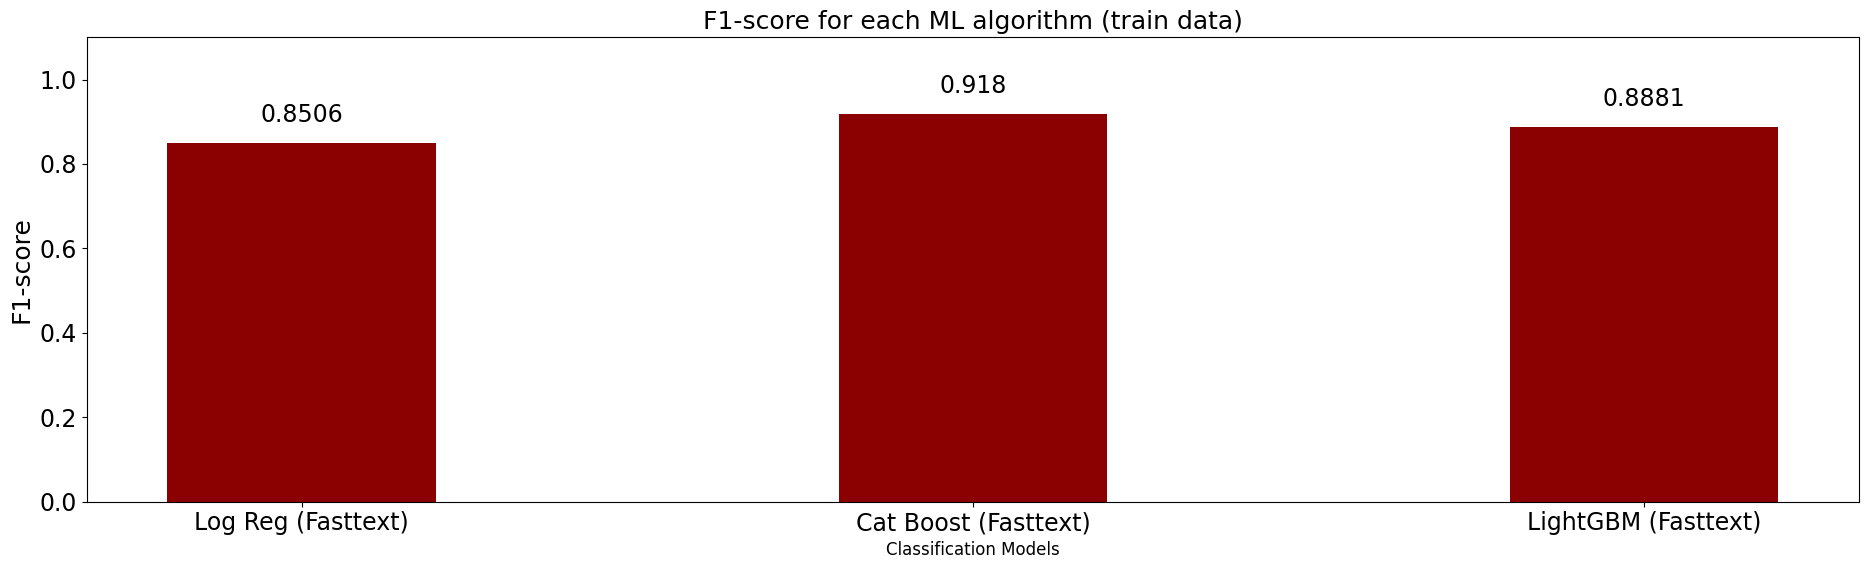

In [175]:
# Generate F1-score plots

plt.rcParams.update({'font.size': 17,
                     'text.color' : 'black',
                     'axes.labelcolor' : "blue"})
# plt.rcParams.update({'axes.titlesize': 'large'})
fig, ax = plt.subplots(figsize=(19, 6))

x = ['Log Reg (Fasttext)',
     'Cat Boost (Fasttext)',
    'LightGBM (Fasttext)']

y = [best_score_logreg,
     best_score_catboost,
     best_score_LGBM]

ax.bar(x, y, width=0.4, color='darkred')
ax.set_title('F1-score for each ML algorithm (train data)', fontsize=18)
ax.set_xlabel('Classification Models', fontsize=12)
ax.set_ylabel('F1-score', fontsize=18)
ax.set_ylim(0, 1.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')

plt.tight_layout();

### *–í—ã–≤–æ–¥:* –í–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–ª—É—á—à–∏–π —Å–∫–æ—Ä —É CatBoost –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞.

## –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö